In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
from scipy.stats import t
import math

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

In [2]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=stud_math.loc[stud_math.loc[:, column].isin(stud_math.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

## Загрузка данных и первичный отсмотр данных

In [3]:
stud_math = pd.read_csv('D:\Programming\Python\data\stud_math.xls')

In [4]:
stud_math.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


### Проводим первичный анализ данных:

In [5]:
print('stud_math.shape()=', stud_math.shape)
stud_math.info()

stud_math.shape()= (395, 30)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup  

#### Видим, что из 30 колонок только в 3 отсутствуют пустые значения(sсhool, sex, age)
#### Посмотрим, сколько пропусков по столбца в процетном отношении

In [6]:
percent_missing = stud_math.isnull().mean() * 100
abs_missing = stud_math.isnull().sum()
missing_value = pd.DataFrame({'column_name': stud_math.columns,
                                 'percent_missing': percent_missing,
                                 'abs_missing': abs_missing})
missing_value.sort_values('percent_missing', ascending = False)

,column_name,percent_missing,abs_missing
Pstatus,Pstatus,11.392405,45
paid,paid,10.126582,40
famsup,famsup,9.873418,39
Fjob,Fjob,9.113924,36
internet,internet,8.607595,34
romantic,romantic,7.848101,31
guardian,guardian,7.848101,31
traveltime,traveltime,7.088608,28
famrel,famrel,6.835443,27
famsize,famsize,6.835443,27


## Первичный анализ данных по столбцам

### Предсказываемая величина score
Сначала проанализируем содержимое самого важного столбца, величину которую мы должны научиться предсказывать.
В нашей выборке эта величина имеет пропуски в 6 случаях(это 1.5% от выборки). Плюс у нас есть странная аномалия с количеством оценок с нулевым баллом. Их слишком много. Формально, это не выброс(см. графики). Выбросом мы могли бы считать, 
значения с баллом меньшие -5. Но, во-первых, значение экзаменационного балла не может быть меньше нуля, во вторых, формальная граница близка к границе выброса. Так что следует признать эти значения выбросом. Я помню, что удалять данные не рекомендуется, но поскольку score - столбец исключительно значимый, т.е. это то значение которое мы учимся предсказывать, то нам важны только те значения в выборке у которых есть ненулевое значение score. Всего "битых" строк у нас 37 с 0 и 6 с NaN = 43 или 11%. Немало, но и не очень много.

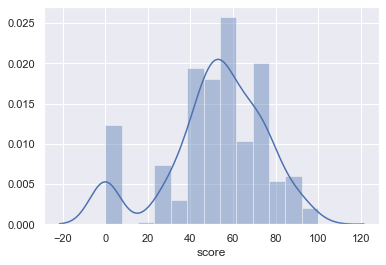

In [7]:
sns.set()
sns.distplot(stud_math['score'])

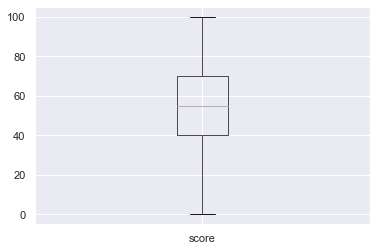

In [8]:
boxplot = stud_math.boxplot(column=['score'])

In [9]:
stud_math.loc[stud_math['score']< 40]['score'].value_counts()

0.0     37
30.0    15
35.0     9
25.0     7
20.0     1
Name: score, dtype: int64

Сохраняем в отдельный DataFrame с именем std_math исходную выборку БЕЗ тех строк, в которых значение столбца score равно NaN или 0.
Конечно, можно придумать какой то алгоритм, который как то правдоподобно перезаписывал бы значения score для таких строк(где score NaN или 0), но нетрудно заметить, что это именно в этом и состоит задание - предсказать эти значения. Поэтому, имеет смысл сделать это в конце, опробовав на этой подвыборке созданный алгоритм. А пока мы от этих строк избавимся.

In [10]:
std_math = stud_math.loc[(stud_math['score']!=0) & (stud_math.score.isnull() == False)]
std_math

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


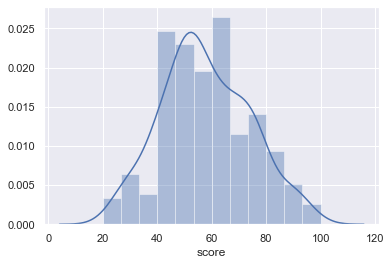

In [11]:
sns.distplot(std_math['score'])

Итак, мы имеем рабочую выборку из 352 строк, с ненулевыми и непустыми значениями в столбце score. Видим, что распределение
score стало больше напоминать "колокол" нормального распрделения. 

In [12]:
scr = stud_math.loc[(stud_math['score']==0) | (stud_math.score.isnull() == True)]

scorenan = stud_math.loc[(stud_math['score']==0) | (stud_math.score.isnull() == True)]
for index, raw in scorenan.iterrows():
    v = stud_math.loc[(stud_math['school']==raw[0]) & 
                      (stud_math['sex']==raw[1]) &
                      (stud_math['age']==raw[2]) &
                      (stud_math['address']==raw[3])
                     ]
std_math
#stud_math.loc[(stud_math['school']=='GP') & (stud_math['sex']=='M')]

Теперь, временно оставим целевой признак и по очереди пройдемся по всем столбцам выборки:

### school 
аббревиатура школы, в которой учится ученик. Можно, предположить, что этот столбец не должен влиять на предсказываемую величину. Посмотрим на соотношение учеников из этих двух типов школ в трех выборках: полной, там где score не 0 и не пцстой, и в той где score 0 или пустой. Видим, что соотношение практически одинаковое:

In [13]:
pd.DataFrame(stud_math.school.value_counts())

,school
GP,349
MS,46


In [14]:
pd.DataFrame(std_math.school.value_counts())

,school
GP,311
MS,41


In [15]:
pd.DataFrame(scr.school.value_counts())

,school
GP,38
MS,5


In [16]:
46/349

0.1318051575931232

In [17]:
41/311

0.13183279742765272

In [18]:
5/38

0.13157894736842105

Посмотрим на распределение score на всей выборке и на подвыборках двух школ.

Распределение score на всей выборке(без выбросов), далее это выборка будет рабочей:

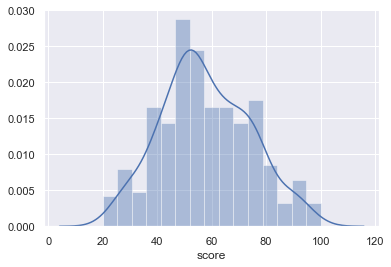

In [19]:
sns.set()
sns.distplot(std_math['score'], bins=15)

Распределение score на всей подвыборке std_math.school=='GP':

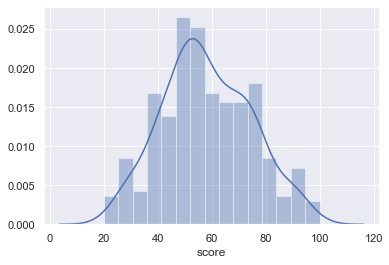

In [20]:
sns.distplot(std_math.loc[std_math.school=='GP']['score'], bins=15)

Распределение score на всей подвыборке std_math.school=='MS':

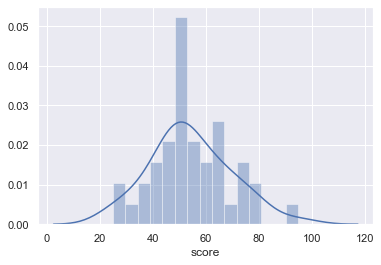

In [21]:
sns.distplot(std_math.loc[std_math.school=='MS']['score'], bins=15)

Найдем средние значения score на подвыборках для школ GP и MS:

In [22]:
std_math.loc[std_math.school=='GP']['score'].mean()

58.21543408360129

In [23]:
std_math.loc[std_math.school=='MS']['score'].mean()

54.26829268292683

Средние значения score для выборок по школам равны, соответственно, 58.22 для GP и 54.27 для MS.
Большое это различие или нет? 
Как раз случай, применить формулы расчета доверительных интервалов и тестирования гипотез.
Найдем и сравним 95% доверительные интервалы для истинного среднего score на обоих выборках.
Поскольку истинное стандартное отклонение нам неизвестно, используем распределение Стьдента:

Доверительный интервал истинного среднего score для школы GP:
Истинное среднее: X = 58.21
Стандартное отклонение s = 16.28: 

In [24]:
std_math.loc[std_math.school=='GP']['score'].std()

16.282245021990203

In [25]:
def confidence_interval_t(alpha, s, n, mean):
    value = abs(t.ppf(alpha / 2, n - 1) * s / math.sqrt(n))
    return mean - value, mean + value

confidence_interval_t(0.05, 16.28, 311, 58.22)

(56.4035595802044, 60.036440419795596)

Мы получили доверительный 95% интервал для истинного среднего score для выборки по школе GP в диапазоне между
56.40 и 60.03

Таким же образом получаем доверительный 95% интервал для score для школы MS:

In [26]:
std_math.loc[std_math.school=='MS']['score'].std()

15.311800008888408

In [27]:
confidence_interval_t(0.05, 15.31, 41, 54.27)

(49.43756774251437, 59.10243225748564)

Мы получили доверительный 95% интервал для истинного среднего score для выборки по школе MS в диапазоне между
49.44 и 59.10

Оценим, насколько пересекаются эти интервалы:

In [28]:
(59.10-56.4)/(60.04-49.44)

0.2547169811320757

Доверительные 95% интервалы перекрываются на 25%

Протестируем гипотезу, что истинное среднее всей выборки равно истинному среднему выборки по школе GP.
Это нулевая гипотеза: H0: X = 58.22(по школе GP)
Альтернативная гипотеза: HA: X < 58.22(гипотеза, что по школе MS истинное среднее ниже, чем по школе GP)
Уровень значимости alpha = 0.05
У нас случайная выборка, достаточно большая n = 41, X = 54.27, s = 15.31

t-статистика:

In [29]:
ts = (54.27-58.22)*(41)**0.5/std_math.loc[std_math.school=='MS']['score'].std()
ts

-1.6518202120702774

In [30]:
pvalue = t.cdf(ts, 41-1)
pvalue

0.053200669830566115

pvalue > alpha, т.е. мы принимаем нулевую гипотезу о том, что истинное среднее равно 58.22

Делаем вывод, что статсистически выборки по школам не отличаются, признак школы не значим для предсказания величины score и столбец school можно удалить.

In [31]:
std_math = std_math.drop('school', 1)
std_math 

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


### sex Пол ученика. 
Данные заполнены полностью, без пропусков. 

In [32]:
pd.DataFrame(std_math.sex.value_counts())

,sex
F,182
M,170


In [33]:
pd.DataFrame(stud_math.sex.value_counts())

,sex
F,208
M,187


In [34]:
pd.DataFrame(scr.sex.value_counts())

,sex
F,26
M,17


In [35]:
print(170/(170+182), 187/(187+208), 17/(17+26))

0.48295454545454547 0.47341772151898737 0.3953488372093023


Строим гистограмму по девушкам и находим средний балл по этой выборке

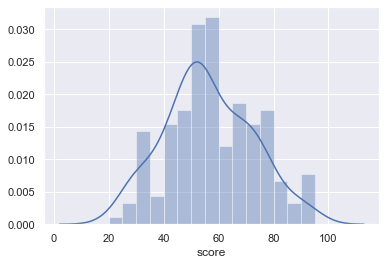

In [36]:
sns.distplot(std_math.loc[std_math.sex=='F']['score'], bins=15)

In [37]:
std_math.loc[std_math.sex=='F']['score'].mean()

56.15384615384615

Строим гистограмму по юношам и находим средний балл по этой выборке

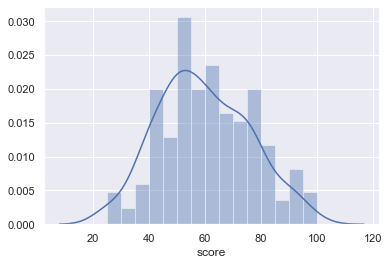

In [38]:
sns.distplot(std_math.loc[std_math.sex=='M']['score'], bins=15)

In [39]:
std_math.loc[std_math.sex=='M']['score'].mean()

59.470588235294116

Не будем делать остальных проверок, аналогично предыдущему пункту.
Очевидно, что данный признак не является значимым для предсказания результата на экзамене.
Удалим этот столбец:

In [40]:
std_math = std_math.drop('sex', 1)
std_math 

,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


### age Возраст ученика
Как мы знаем из нашего запроса в самом начале этот столбец не содержит пустых данных.
Проверим статистику по количесмтву учащихся в нашей выборке в разрезе возрастов:

In [41]:
pd.DataFrame(std_math.age.value_counts())

,age
16,96
17,90
15,76
18,69
19,16
20,3
22,1
21,1


#### Учащихся с возрастом старше 19 лет слишком мало, чтобы по этим возрастам формировать какую то статистику
Поэтому при анализе тенденции целевого параметра в зависимости от возраста мы будем рассматривать возраста только до 19 лет. 
Посмотрим на среднее и стандартное отклонение предсказываемлй величины на выборках, в зависимости от возраста:

In [42]:
ages = pd.DataFrame(std_math.age.value_counts().sort_index())
print("%5s%7s%5s%9s" % ('age', 'count', 'mean', 'std'))
for index, row in ages.iterrows():
    if index < 20:
        print("%5d%5d   %5f% 5f" % (index, row[0], 
                                round(std_math.loc[std_math['age']==index]['score'].mean(),6),
                                round(std_math.loc[std_math['age']==index]['score'].std(),6)))

  age  count mean      std
   15   76   60.723684 17.237632
   16   96   59.218750 15.998818
   17   90   55.944444 15.594843
   18   69   56.014493 16.462518
   19   16   52.812500 9.481341


Видим, на первый взгляд, очевидную зависимость среднего значения оценки от возраста на данной выборке. 
Как будто бы, чем больше возраст, тем средняя оценка ниже. 
В принципе, это может быть правдой, например, из-за того, что тесты для более старших учащихся сложнее.
С другой стороны, выборка для 19-летних довольно мала - всего 16. Судя по тому, что среднеквадратичное отклонение параметра score по этой выборке сильно отличается от 4-х других - ее размер недостаточен для того, чтобы серьезно ориентироваться на эти данные.
При этом, среднее значение score для 18-летних отличается от аналогичного параметра для 15-летних уже не так заметно. 

Попробуем протестировать гипотезу об истинном среднем выборки по возрасту 18 лет.
Нулевой гипотезой будем считать, что истинное среднее X = 60, как для выборки для 15-летних.
Альтернативной гипотезой будем считать утверждение, что X < 60
Уровень значимости alpha = 0.
У нас случайная выборка, достаточно большая n = 69, X = 56.02, s = 16.46

In [43]:
ts = (56.02-60.72)*(69)**0.5/16.46
ts

-2.3718792318174313

In [44]:
pvalue = t.cdf(ts, 69-1)
pvalue

0.010267405360108244

pvalue меньше alpha, что дает основание отвергнуть нулевую гипотезу и признать вероятным, 
что у целевого параметра есть зависимость от возраста

## address тип адреса ученика ('U' - городской, 'R' - за городом)

Этот столбец содержит пустые значения в 17 строках(4.3%) по всей выборке

In [45]:
std_math.address.isnull().sum()

14

И 14 по рабочей выборке с ненулевыми и непустыми score

In [46]:
std_math.address.value_counts()

U    265
R     73
Name: address, dtype: int64

In [47]:
address = pd.DataFrame(std_math.address.value_counts().sort_index())
print("%5s%7s%5s%4s" % ('addr', 'count', 'mean', 'std'))
for index, row in address.iterrows():
    print("%5s%5d%5d%5d" % (index, row[0], 
                            std_math.loc[std_math['address']==index]['score'].mean(),
                            std_math.loc[std_math['address']==index]['score'].std()))

 addr  count mean std
    R   73   53   16
    U  265   58   16


In [48]:
std_math.address.isnull().sum()

14

Попробуем найи корелляцию с другими параметрами. чтобы более точно заполнить пустые значения.
Можно, предположить, что признак город/сельская местность может кореллироваться сналичием интернета, размером семьи, профессией родителей, время в пути до школы, причина выбора школы, дополнительная образовательная поддержка. 
Чтобы применить функуцию корелляции DataFrame.corr() нам нужно сделать интересующие нас признаки числовыми.
Я не трогаю исходные столбцы, а добавояю новые:

In [49]:
std_math['addressnum'] = std_math.address.astype(str).apply(lambda x: 1 if x.strip() == 'U' else 2 if x.strip() == 'R' else 0)

In [50]:
std_math['famsizenum'] = std_math.famsize.astype(str).apply(lambda x: 1 if x.strip() == 'GT3' else 2 if x.strip() == 'LE3' else 0)

In [51]:
std_math['internetnum'] = std_math.internet.astype(str).apply(lambda x: 1 if x.strip() == 'yes' else 2 if x.strip() == 'no' else 0)

In [52]:
std_math.Fjob.value_counts()

other       176
services     89
teacher      26
health       15
at_home      14
Name: Fjob, dtype: int64

In [53]:
std_math['Fjobnum'] = std_math.Fjob.astype(str).apply(lambda x: 1 if x.strip() == 'teacher' 
                                                           else 2 if x.strip() == 'health' 
                                                           else 3 if x.strip() == 'services'
                                                           else 4 if x.strip() == 'at_home'
                                                           else 5 if x.strip() == 'other'
                                                           else 0)

In [54]:
std_math.Mjob.value_counts()

other       115
services     90
teacher      51
at_home      49
health       30
Name: Mjob, dtype: int64

In [55]:
std_math['Mjobnum'] = std_math.Mjob.astype(str).apply(lambda x: 1 if x.strip() == 'teacher' 
                                                           else 2 if x.strip() == 'health' 
                                                           else 3 if x.strip() == 'services'
                                                           else 4 if x.strip() == 'at_home'
                                                           else 5 if x.strip() == 'other'
                                                           else 0)

In [56]:
std_math.reason.value_counts()

course        119
reputation     96
home           89
other          33
Name: reason, dtype: int64

In [57]:
std_math['reasonnum'] = std_math.reason.astype(str).apply(lambda x: 1 if x.strip() == 'course' 
                                                           else 2 if x.strip() == 'reputation' 
                                                           else 3 if x.strip() == 'home'                                                           
                                                           else 4 if x.strip() == 'other'
                                                           else 0)

In [58]:
std_math.schoolsup.value_counts()

no     295
yes     48
Name: schoolsup, dtype: int64

In [59]:
std_math['schoolsupnum'] = std_math.schoolsup.astype(str).apply(lambda x: 1 if x.strip() == 'yes' 
                                                                else 2 if x.strip() == 'no' else 0)

Посмотрим теперь корелляцию адреса с другими полями:

In [60]:
cr = std_math.corr()
abs(cr['addressnum']).sort_values(ascending = False)

addressnum             1.000000
traveltime             0.236188
Medu                   0.157835
score                  0.134162
age                    0.119158
internetnum            0.112327
freetime               0.108739
Mjobnum                0.088458
goout                  0.075874
failures               0.073762
famsizenum             0.063003
Fjobnum                0.057483
studytime, granular    0.038990
studytime              0.038990
Fedu                   0.037491
schoolsupnum           0.027753
reasonnum              0.017116
famrel                 0.013027
health                 0.004046
absences               0.003366
Name: addressnum, dtype: float64

Видим, что у адреса есть заметная корелляция с целевым параметром score. Но еще больше у него корелляция с параметром traveltime. Посмотрим на характер корелляции.

In [61]:
std_math.loc[std_math['address'] == 'U'].traveltime.value_counts()

1.0    181
2.0     59
3.0      7
4.0      3
Name: traveltime, dtype: int64

In [62]:
std_math.loc[std_math['address'] == 'R'].traveltime.value_counts()

1.0    32
2.0    22
3.0    10
4.0     4
Name: traveltime, dtype: int64

Видим, что для большинства учащихся живущих в городах, дорога до школы занимала менее 15 мин. 
У учеников из сельской местности процент учеников с таким показателем заметно ниже.
Т.е. там где заполнен параметр traveltime, можно поставить в адресе U, если traveltime = 1 и R - в остальных случаях

In [63]:
stud_math.loc[stud_math['address'].isnull()==True]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
52,GP,M,15,NaN,LE3,A,4.0,2.0,health,NaN,other,father,2.0,1.0,1.0,no,NaN,no,no,yes,-3.0,yes,NaN,no,5.0,5.0,5.0,5.0,6.0,50.0
75,GP,M,15,NaN,GT3,T,4.0,3.0,teacher,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,NaN,NaN,3.0,3.0,5.0,6.0,50.0
92,GP,F,16,NaN,LE3,T,NaN,1.0,other,other,home,father,1.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,3.0,3.0,NaN,2.0,4.0,30.0
96,GP,M,16,NaN,GT3,NaN,4.0,3.0,services,other,reputation,mother,2.0,1.0,0.0,yes,yes,NaN,yes,no,-3.0,NaN,yes,no,3.0,3.0,3.0,4.0,2.0,75.0
159,GP,M,16,NaN,GT3,T,3.0,NaN,other,services,course,father,1.0,2.0,1.0,no,yes,yes,no,yes,-6.0,yes,yes,yes,4.0,5.0,5.0,5.0,4.0,60.0
168,GP,F,16,NaN,GT3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,no,-6.0,yes,yes,no,5.0,1.0,5.0,4.0,0.0,0.0
241,GP,M,17,NaN,LE3,A,4.0,4.0,teacher,other,course,mother,NaN,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,3.0,3.0,NaN,4.0,2.0,60.0
254,GP,M,17,NaN,NaN,T,2.0,1.0,other,other,course,mother,1.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,4.0,4.0,2.0,5.0,NaN,60.0
270,GP,F,19,NaN,GT3,T,3.0,3.0,other,services,home,other,1.0,2.0,2.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,4.0,3.0,5.0,5.0,NaN,NaN


Посмотрим, как распределяются значения параметра "Профессия матери" для городских и сельских учеников:
Видим, что наибольшие отличия в статистике параметров services и at_home. 
services - заметно чаще встречается у городсктх учеников, at_home - более характерен для сельских жителей.

In [64]:
std_math.loc[std_math['address'] == 'U'].Mjob.value_counts(normalize = True)

other       0.332
services    0.296
teacher     0.156
at_home     0.120
health      0.096
Name: Mjob, dtype: float64

In [65]:
std_math.loc[std_math['address'] == 'R'].Mjob.value_counts(normalize = True)

other       0.380282
at_home     0.253521
services    0.183099
teacher     0.140845
health      0.042254
Name: Mjob, dtype: float64

Параметр internet демонстрирует некоторую зависимость от места жительства ученика.
отсутствие доступа в интернет среди сельских жителей встречается почти в 2.5 чаще , чем для городских

In [66]:
std_math.loc[std_math['address'] == 'U'].internet.value_counts(normalize = True)

yes    0.884774
no     0.115226
Name: internet, dtype: float64

In [67]:
std_math.loc[std_math['address'] == 'R'].internet.value_counts(normalize = True)

yes    0.716418
no     0.283582
Name: internet, dtype: float64

Вывод: Предлагается, следующий алгоритм заполнения пропусков в поле address:
Если traveltime - 1 считаем, что это городской житель
Если traveltime - 3 или 4 - считаем, что это сельский житель
Если traveltime - 2 или пусто, анализируем работу матери и доступ в интернет:
   Если мама at_home , то это сельский житель
   Если мама services - это городской житель.
   В остальных случаях если есть интернет - город, нет интернета - село.
   ветка else - по умолчанию город.
   
модифицировать нужно две выборки: std_math и исходную stud_math

In [68]:
def set_address(raw):     
    if not pd.isnull(raw['address']): #address
        return raw['address']
    elif raw['traveltime'] == 1:#traveltime
        return 'U'        
    elif raw['traveltime'] in (3, 4):
        return 'R'
    elif raw['Mjob'] == 'at_home' or raw['internet'] == 'no': # [7].Mjob  [21].internet
        return 'R'
    else:
        return 'U'       
#std_math.address = std_math.apply(lambda vx: set_address(vx.address, vx.traveltime, vx.Mjob, vx.internet)) 
std_math['address'] = std_math.apply(set_address, axis = 1) 

In [69]:
std_math['addressnum'] = std_math.address.astype(str).apply(lambda x: 1 if x.strip() == 'U' else 2 if x.strip() == 'R' else 0)

In [70]:
#std_math.address = std_math.apply(lambda vx: set_address(vx.address, vx.traveltime, vx.Mjob, vx.internet)) 
stud_math['address'] = stud_math.apply(set_address, axis = 1)

In [71]:
stud_math.loc[stud_math['address'].isnull()==True]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score


In [72]:
std_math.address.value_counts()

U    277
R     75
Name: address, dtype: int64

## famsize размер семьи ('LE3' <= 3, 'GT3' >3)

In [73]:
std_math.famsize.value_counts()

GT3    228
LE3    100
Name: famsize, dtype: int64

In [74]:
std_math.loc[std_math.famsize=='GT3']['score'].mean()

57.60964912280702

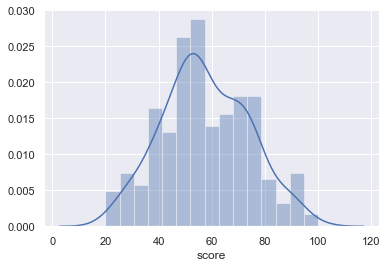

In [75]:
sns.distplot(std_math.loc[std_math.famsize=='GT3']['score'], bins=15)

In [76]:
std_math.loc[std_math.famsize=='LE3']['score'].mean()

58.5

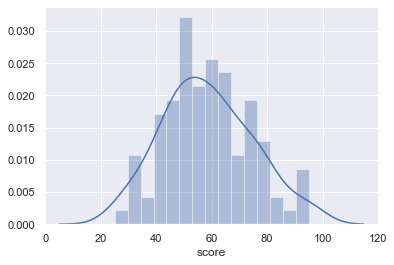

In [77]:
sns.distplot(std_math.loc[std_math.famsize=='LE3']['score'], bins=15)

In [78]:
abs(cr['famsizenum']).sort_values(ascending = False)

famsizenum             1.000000
addressnum             0.063003
health                 0.059052
goout                  0.051687
studytime, granular    0.047025
studytime              0.047025
Medu                   0.046762
Mjobnum                0.044873
reasonnum              0.037144
score                  0.036708
Fjobnum                0.032886
freetime               0.032359
traveltime             0.029276
Fedu                   0.028482
failures               0.028163
age                    0.023977
internetnum            0.014495
schoolsupnum           0.014239
famrel                 0.010586
absences               0.010537
Name: famsizenum, dtype: float64

У этого признака низкая корелляция с целевым признаком и нет признака с которыми он был бы высококореллирован. Следовательно, избавляемся от него

In [79]:
std_math = std_math.drop('famsize', 1)
stud_math = stud_math.drop('famsize', 1)
std_math = std_math.drop('famsizenum', 1)

## Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

 У этого признака самый выслкий процент пропущенных значений. Но по сути, он вряд ли имеет существенную корелляцию с целевым признаком 

In [80]:
std_math.Pstatus.value_counts()

T    277
A     34
Name: Pstatus, dtype: int64

In [81]:
stud_math.Pstatus.value_counts()

T    314
A     36
Name: Pstatus, dtype: int64

интересно, что значений "живут раздельно" очень мало в выборке и в процентном и в абсолютном выражении. На всякий случай, проверим среднее по этим выборкам

In [82]:
std_math.loc[std_math.Pstatus=='T']['score'].mean()

57.49097472924188

In [83]:
std_math.loc[std_math.Pstatus=='A']['score'].mean()

58.38235294117647

Посмотрим корелляцию с другими признаками

In [84]:
std_math['Pstatusnum'] = std_math.Pstatus.astype(str).apply(lambda x: 1 if x.strip() == 'T' else 2 if x.strip() == 'A' else 0)
cr = std_math.corr()

In [85]:
abs(cr['Pstatusnum']).sort_values(ascending = False)

Pstatusnum             1.000000
traveltime             0.135371
Medu                   0.113381
Fjobnum                0.105439
Fedu                   0.084681
absences               0.068138
Mjobnum                0.050589
famrel                 0.038278
freetime               0.036821
internetnum            0.021123
schoolsupnum           0.017924
health                 0.017720
goout                  0.012829
score                  0.011694
studytime, granular    0.008961
studytime              0.008961
addressnum             0.007650
age                    0.007047
failures               0.003524
reasonnum              0.000690
Name: Pstatusnum, dtype: float64

Целевой признак от него никак не зависит. Есть небольшая корелляция с признаками traveltime, Medu, Fjobnum

In [86]:
std_math.loc[std_math.Pstatus=='A'].traveltime.value_counts()

1.0    24
2.0     6
3.0     1
Name: traveltime, dtype: int64

In [87]:
std_math.loc[std_math.Pstatus=='T'].traveltime.value_counts()

1.0    175
2.0     70
3.0     12
4.0      5
Name: traveltime, dtype: int64

In [88]:
std_math.loc[std_math.Pstatus.isnull()==True].traveltime.value_counts()

1.0    20
2.0    10
3.0     4
4.0     2
Name: traveltime, dtype: int64

In [89]:
std_math.loc[std_math.traveltime.isnull()==True].Pstatusnum.value_counts()

1    15
0     5
2     3
Name: Pstatusnum, dtype: int64

Удалять пока не будем, но и заполнять пропуски тоже. Возможно, используем этот признак для заполнения пустых значений перечисленных признаков 

## Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

Пропущенных значений во всей выборке очень мало, всего 3(2 в подвыборке), это меньше процента

Посмотрим, распределение значений признака на изучаемой выборке. Поскольку возможных значений мало, это нагляднее, чем график

In [90]:
std_math.Medu.value_counts()

4.0    125
2.0     88
3.0     87
1.0     47
0.0      3
Name: Medu, dtype: int64

Видим, что строк со хначением признака равно 0 пренебрежимо мало и по выборке из 3 делать какие то выводы нельзя.
Но по подвыборкам с остальными значениями можно посмотреть среднее и дисперсию целевого признака

In [91]:
medu = pd.DataFrame(std_math.Medu.value_counts().sort_index())
print("%5s%7s%5s%4s" % ('Medu', 'count', 'mean', 'std'))
for index, row in medu.iterrows():
    print("%5d%5d%5d%5d" % (index, row[0], 
                                std_math.loc[std_math['Medu']==index]['score'].mean(),
                                std_math.loc[std_math['Medu']==index]['score'].std()))

 Medu  count mean std
    0    3   65   17
    1   47   51   12
    2   88   56   13
    3   87   57   17
    4  125   61   17


строк с нулевым признаком всего 3, поэтому первую строку не берем в расчет. Но в остальном прослеживается тенденция прямой зависимости от успехов от образования матери

Сделаем корелляционный анализ, с какими признаками есть корелляция:

In [92]:
abs(cr['Medu']).sort_values(ascending = False)

Medu                   1.000000
Mjobnum                0.457007
Fedu                   0.247339
failures               0.205944
score                  0.186477
addressnum             0.173679
traveltime             0.165394
Fjobnum                0.161035
internetnum            0.148681
age                    0.122979
Pstatusnum             0.113381
schoolsupnum           0.091698
goout                  0.080556
reasonnum              0.075997
studytime              0.070533
studytime, granular    0.070533
health                 0.038050
absences               0.027377
freetime               0.021002
famrel                 0.000958
Name: Medu, dtype: float64

У этого признака довольно высокая корелляция со многими признаками, включая целевой. Он вполне может подойти для восстановления пропущенных значений в
Mjob и traveltime.

In [93]:
std_math.loc[std_math.Medu.isnull()==True].traveltime.value_counts()

1.0    2
Name: traveltime, dtype: int64

In [94]:
std_math.loc[std_math.Medu.isnull()==True]

,age,address,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score,addressnum,internetnum,Fjobnum,Mjobnum,reasonnum,schoolsupnum,Pstatusnum
92,16,U,T,NaN,1.0,other,other,home,father,1.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,3.0,3.0,NaN,2.0,4.0,30.0,1,2,5,5,3,1,1
193,16,R,NaN,NaN,3.0,services,services,reputation,mother,1.0,1.0,0.0,no,yes,no,yes,yes,-3.0,yes,yes,no,4.0,3.0,2.0,5.0,8.0,50.0,2,1,3,3,2,2,0


Недостающие значения лучше всего восстановить по Mjob с которым у этого признака очень хорошая корелляция, а если он не заполнен, то еще и по Fedu. Посмотрим, на связь  с этими признаками: 

Посмортрим взаимные средние Mjob и Medu в зависимости друг от друга, чтобы нагляднее сопоставить их:

In [95]:
#std_math['Mjobnum'] = std_math.Mjob.astype(str).apply(lambda x: 1 if x.strip() == 'teacher' 
#                                                           else 2 if x.strip() == 'health' 
#                                                           else 3 if x.strip() == 'services'
#                                                           else 4 if x.strip() == 'at_home'
#                                                          else 5 if x.strip() == 'other'
#                                                           else 0)

medujob = pd.DataFrame(std_math.Medu.value_counts().sort_index())
print("%5s%7s%5s%4s" % ('Medu', 'count', 'mean', 'std'))
for index, row in medujob.iterrows():
    print("%5d%5d%5d%5d" % (index, row[0], 
                                std_math.loc[std_math['Medu']==index]['Mjobnum'].mean(),
                                std_math.loc[std_math['Medu']==index]['Mjobnum'].std()))

 Medu  count mean std
    0    3    4    0
    1   47    4    1
    2   88    3    1
    3   87    3    1
    4  125    2    1


In [96]:
mjob = pd.DataFrame(std_math.Mjobnum.value_counts().sort_index())
print("%5s%7s%5s%4s" % ('Mjobnum', 'count', 'mean', 'std'))
for index, row in mjob.iterrows():
    print("%5d%5d%5d%5d" % (index, row[0], 
                                std_math.loc[std_math['Mjobnum']==index]['Medu'].mean(),
                                std_math.loc[std_math['Mjobnum']==index]['Medu'].std()))

Mjobnum  count mean std
    0   17    3    1
    1   51    3    0
    2   30    3    0
    3   90    2    0
    4   49    1    0
    5  115    2    1


Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

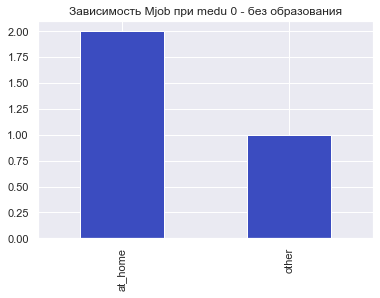

In [97]:
std_math.loc[std_math.Medu==0]['Mjob'].value_counts().plot(kind = 'bar', 
                              grid = True, 
                              colormap = 'coolwarm', 
                              title = 'Зависимость Mjob при medu 0 - без образования')

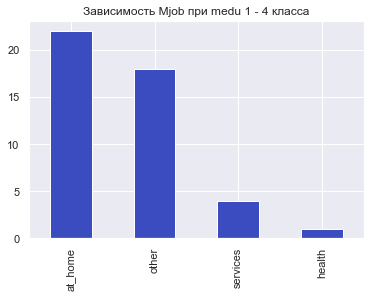

In [98]:
std_math.loc[std_math.Medu==1]['Mjob'].value_counts().plot(kind = 'bar', 
                              grid = True, 
                              colormap = 'coolwarm', 
                              title = 'Зависимость Mjob при medu 1 - 4 класса')

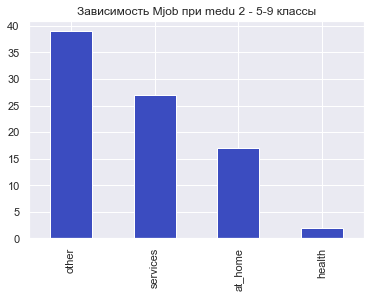

In [99]:
std_math.loc[std_math.Medu==2]['Mjob'].value_counts().plot(kind = 'bar', 
                              grid = True, 
                              colormap = 'coolwarm', 
                              title = 'Зависимость Mjob при medu 2 - 5-9 классы')

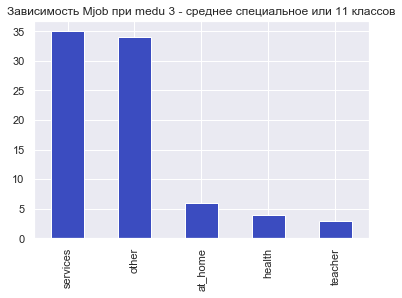

In [100]:
std_math.loc[std_math.Medu==3]['Mjob'].value_counts().plot(kind = 'bar', 
                              grid = True, 
                              colormap = 'coolwarm', 
                              title = 'Зависимость Mjob при medu 3 - среднее специальное или 11 классов')

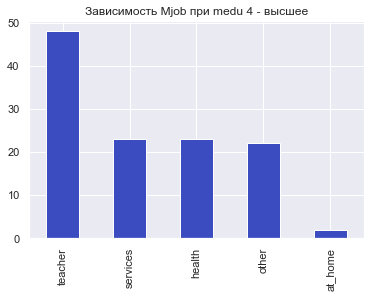

In [101]:
std_math.loc[std_math.Medu==4]['Mjob'].value_counts().plot(kind = 'bar', 
                              grid = True, 
                              colormap = 'coolwarm', 
                              title = 'Зависимость Mjob при medu 4 - высшее')

Глядя на графики, можно установить приблизительную связь между показателями Mjob и Medu:
Mjob     -  Medu
at_home  -  0
at_home  -  1
other    -  2
services -  3
teacher  -  4
health   -  4

In [102]:
std_math.Mjob.value_counts()

other       115
services     90
teacher      51
at_home      49
health       30
Name: Mjob, dtype: int64

По результатам предыдущих проверок пишем функцию и заполянем пустые згачение в Medu. Их всего три,
и нам достаточно только значений Mjob для восстановления

In [103]:
def set_Medu(raw):
    if not pd.isnull(raw['Medu']):
        return raw['Medu']
    elif raw['Mjob']=='at_home':
        return 1
    elif raw['Mjob']=='other':
        return 2
    elif raw['Mjob']=='services':
        return 3
    else:
        return 4
std_math['Medu'] = std_math.apply(set_Medu, axis = 1) 
stud_math['Medu'] = stud_math.apply(set_Medu, axis = 1) 

In [104]:
std_math.loc[std_math['Medu'].isnull()==True]

,age,address,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score,addressnum,internetnum,Fjobnum,Mjobnum,reasonnum,schoolsupnum,Pstatusnum


In [105]:
stud_math.loc[stud_math['Medu'].isnull()==True]


,school,sex,age,address,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score


## Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

Пропущенных значение около 6%, в абсолютном выражении 24

Будем действовать примерно по аналогии с предыдущим признаком:

In [106]:
std_math.Fedu.value_counts().sort_index()

0.0      2
1.0     65
2.0     94
3.0     89
4.0     80
40.0     1
Name: Fedu, dtype: int64

Видим, что кроме пустых значений у нас еще есть одно ошибочсное значение. 
Очистим его, чтобы вместе с остальными пропусками заполнить более менее адекватными значениями

In [107]:
std_math.loc[std_math['Fedu']==40]

,age,address,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score,addressnum,internetnum,Fjobnum,Mjobnum,reasonnum,schoolsupnum,Pstatusnum
11,15,U,NaN,2.0,40.0,services,other,reputation,father,3.0,3.0,0.0,no,yes,no,yes,yes,-9.0,yes,yes,no,5.0,2.0,2.0,4.0,4.0,60.0,1,1,5,3,2,2,0


In [108]:
std_math.loc[std_math['Fedu']==40, 'Fedu']=float('nan')


In [109]:
std_math.loc[std_math['Fedu']==40]

,age,address,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score,addressnum,internetnum,Fjobnum,Mjobnum,reasonnum,schoolsupnum,Pstatusnum


Посмотрим, зависит ли целевой признак от данного:

In [110]:
fedu = pd.DataFrame(std_math.Fedu.value_counts().sort_index())
print("%5s%7s%7s      %4s" % ('Fedu', 'count', 'mean', 'std'))
for index, row in fedu.iterrows():
    print("%5d%5d   %7f   %5f" % (index, row[0], 
                                round(std_math.loc[std_math['Fedu']==index]['score'].mean(),2),
                                round(std_math.loc[std_math['Fedu']==index]['score'].std(),2)))

 Fedu  count   mean       std
    0    2   65.000000   21.210000
    1   65   53.460000   15.080000
    2   94   57.820000   15.740000
    3   89   57.080000   16.510000
    4   80   61.250000   16.100000


Похоже, что чем у папы лучше образование, то и выше шанс у ученика получить балл выше.
Посмотрим на корелляциолнный анализ:

In [111]:
abs(cr['Fedu']).sort_values(ascending = False)

Fedu                   1.000000
Medu                   0.247339
Mjobnum                0.147482
failures               0.141995
age                    0.121617
Pstatusnum             0.084681
internetnum            0.080236
freetime               0.071328
addressnum             0.070750
score                  0.069842
Fjobnum                0.058403
famrel                 0.049613
studytime, granular    0.049060
studytime              0.049060
traveltime             0.042074
goout                  0.026507
health                 0.025874
reasonnum              0.012229
schoolsupnum           0.008117
absences               0.000245
Name: Fedu, dtype: float64

Результаты немного обескураживающие: видим слабую корелляцию с целевым признаком(в противовес предыдущей оценке),
видим хорошую корелляцию с образованием матери и почему то очень низкую с профессией самого отца, что неожиданно.
Т.е. если верить этим данным - восстанавливать пустые значения имеет смысл по данным об образовании матери.

Обратим внимание на то, что для значений Fedu 2, 3, 4 средние значения score действительно близки, но для Fedu = 1, среднее значение score заметно меньше. Запомним это и оставляем признак как значимый.

Исследуем зависимость между Fedu и Medu: 

In [112]:
print("%5s%7s%5s" % ('Fedu', 'count', 'mean'))
for index, row in fedu.iterrows():
    print("%5d%5d%5d" % (index, row[0], 
                                std_math.loc[std_math['Fedu']==index]['Medu'].mean()))

 Fedu  count mean
    0    2    2
    1   65    1
    2   94    2
    3   89    3
    4   80    3


In [113]:
std_math.loc[std_math['Fedu']==1]['Medu'].value_counts()

1.0    28
2.0    23
3.0    13
0.0     1
Name: Medu, dtype: int64

In [114]:
pivot = std_math.pivot_table(values=['score'],
index=['Medu'],
columns=['Fedu'],
aggfunc='count')
display(pivot)

score                        
Fedu   0.0   1.0   2.0   3.0   4.0
Medu                              
0.0    NaN   1.0   2.0   NaN   NaN
1.0    1.0  28.0  11.0   4.0   1.0
2.0    NaN  23.0  41.0  15.0   6.0
3.0    NaN  13.0  22.0  33.0  14.0
4.0    1.0   NaN  18.0  37.0  59.0

Предлагается для заполнения пустых значений Fedu использовать прямую зависимость Fedu = Medu

In [115]:
#stud_math['Fedu'] = stud_math.apply(set_Medu, axis = 1)
std_math.loc[std_math['Fedu'].isnull()==True,'Fedu'] = std_math['Medu']

In [116]:
stud_math.loc[stud_math['Fedu'].isnull()==True,'Fedu'] = stud_math['Medu']

In [117]:
stud_math.loc[stud_math['Fedu'].isnull()==True]

,school,sex,age,address,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score


Как вывод: корелляция этого признака с целевым сомнительна. Для Fedu = 0 слишком мало данных, но для Fedu = 1 истинное среднее
целевого признака ниже истинных средних для бОльших значений

## Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

19 пропусков это 4.8 % на общей выборке
В принципе, этот признак уже исследован нами в предыдущих пунктах, мы значем, 
что у него хорошая корелляция с Medu и с целевым признаком.
Смотрим его корелляцию, делаем выводы, что недостающие значения будем восстанавливать отталкиваясь от корелляции
с Medu, Fedu, schoolsup, addressnum в указанном порядке приоритета

In [118]:
abs(cr['Mjobnum']).sort_values(ascending = False)

Mjobnum                1.000000
Medu                   0.457007
schoolsupnum           0.172275
score                  0.164722
Fedu                   0.147482
Fjobnum                0.124568
addressnum             0.112746
failures               0.094092
traveltime             0.092713
goout                  0.080089
age                    0.073749
internetnum            0.071724
freetime               0.052380
health                 0.051547
Pstatusnum             0.050589
studytime, granular    0.040745
studytime              0.040745
famrel                 0.029525
reasonnum              0.018035
absences               0.000545
Name: Mjobnum, dtype: float64

In [119]:
mjob = pd.DataFrame(std_math.Mjob.value_counts().sort_index())
print("%5s%10s %5s       %4s" % ('Mjob', 'count', 'mean', 'std'))
for index, row in mjob.iterrows():
    print("%8s%5d   %5f   %5f" % (index, row[0], 
                                round(std_math.loc[std_math['Mjob']==index]['score'].mean(), 2),
                                round(std_math.loc[std_math['Mjob']==index]['score'].std(),2)))

 Mjob     count  mean        std
 at_home   49   54.080000   14.600000
  health   30   64.670000   15.080000
   other  115   54.700000   15.340000
services   90   59.610000   16.930000
 teacher   51   59.510000   16.800000


Зависимость, неочевидна, но разброс средних довольно велик от 54 до 65. пока считаем, что признак значим

In [120]:
pivot = std_math.pivot_table(values=['score'],
index=['Medu'],
columns=['Mjob'],
aggfunc='count')
display(pivot)

score                              
Mjob at_home health other services teacher
Medu                                      
0.0      2.0    NaN   1.0      NaN     NaN
1.0     22.0    1.0  18.0      4.0     NaN
2.0     17.0    2.0  40.0     27.0     NaN
3.0      6.0    4.0  34.0     36.0     3.0
4.0      2.0   23.0  22.0     23.0    48.0

Глядя на это распределение, можем написать такой маппинг:

Medu -  Mjob

1       at_home

4    -  health

2    -  other

3    -  services

4    -  teacher

0    -  at_home

In [121]:
pivot = std_math.pivot_table(values=['score'],
index=['Fedu'],
columns=['Mjob'],
aggfunc='count')
display(pivot)

score                              
Mjob at_home health other services teacher
Fedu                                      
0.0      NaN    NaN   1.0      NaN     1.0
1.0     19.0    2.0  29.0     15.0     1.0
2.0     14.0    8.0  35.0     29.0     6.0
3.0      8.0    9.0  35.0     22.0    16.0
4.0      8.0   11.0  15.0     24.0    27.0

Глядя на это распределение, можем написать такой маппинг:

Fedu -  Mjob

1, 2, 3 - other

4    -  teacher

0    -  at_home

0 - at_home, это скорее эмпирическое соображение, чем результат изучения данного графика.
для Fedu = 0 всего два значения. это слишком мало

In [122]:
def set_Mjob(raw):
    if not pd.isnull(raw['Mjob']):
        return raw['Mjob']
    elif raw['Medu'] in (0, 1):
        return 'at_home'
    elif raw['Medu'] == 2:
        return 'other'
    elif raw['Medu'] == 3:
        return 'services'
    elif raw['Medu'] == 4 and raw['Fedu'] == 4:
        return 'teacher'
    elif raw['Medu'] == 4:
        return 'health'
    elif raw['Fedu'] in (1, 2, 3): 
        return 'other'
    elif raw['Fedu'] == 0: 
        return 'at_home'
    elif raw['Fedu'] == 4: 
        return 'teacher'
    else:
        return 'other' #от фонаря
std_math['Mjob'] = std_math.apply(set_Mjob, axis = 1) 
stud_math['Mjob'] = stud_math.apply(set_Mjob, axis = 1) 

In [123]:
std_math['Mjobnum'] = std_math.Mjob.astype(str).apply(lambda x: 1 if x.strip() == 'teacher' 
                                                           else 2 if x.strip() == 'health' 
                                                           else 3 if x.strip() == 'services'
                                                           else 4 if x.strip() == 'at_home'
                                                           else 5 if x.strip() == 'other'
                                                           else 0)

In [124]:
stud_math['Mjobnum'] = stud_math.Mjob.astype(str).apply(lambda x: 1 if x.strip() == 'teacher' 
                                                           else 2 if x.strip() == 'health' 
                                                           else 3 if x.strip() == 'services'
                                                           else 4 if x.strip() == 'at_home'
                                                           else 5 if x.strip() == 'other'
                                                           else 0)

In [125]:
stud_math.loc[stud_math['Mjob'].isnull()==True]

,school,sex,age,address,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score,Mjobnum


## Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

9% пропусков всего	36

Проверим влияние признака на целевой и его корелляцию разными способами. Для проверки корелляции
будем использовать числовое отображение данного номинативного признака Fjobnum

In [126]:
abs(cr['Fjobnum']).sort_values(ascending = False)

Fjobnum                1.000000
Medu                   0.161035
Mjobnum                0.124568
score                  0.117204
Pstatusnum             0.105439
absences               0.075458
internetnum            0.066343
Fedu                   0.058403
failures               0.056056
schoolsupnum           0.052338
age                    0.032654
addressnum             0.029737
traveltime             0.029551
studytime, granular    0.026053
studytime              0.026053
health                 0.025978
goout                  0.012483
famrel                 0.011477
freetime               0.004447
reasonnum              0.004000
Name: Fjobnum, dtype: float64

Видим, что есть корелляция с целевым признаком. Из других столбцов лучше всего соотносится с Medu.
Следовательно Medu и будем использовать для заполнения пропусков

Смотрим статистику по подвыборкам значений признака. Видим, что среднее значение выбивается из общей тенденции
только для знаяения teacher, при этом выборка мала (меньше 30) и среднестатистиченское отклонение выше.
В общем, это несколько сомнительная зависимость

In [127]:
fjob = pd.DataFrame(std_math.Fjob.value_counts().sort_index())
print("%5s%10s %5s        %4s" % ('Fjob', 'count', 'mean', 'std'))
for index, row in fjob.iterrows():
    print("%8s%5d   %5f   %5f" % (index, row[0], 
                                round(std_math.loc[std_math['Fjob']==index]['score'].mean(), 2),
                                round(std_math.loc[std_math['Fjob']==index]['score'].std(),2)))

 Fjob     count  mean         std
 at_home   14   59.290000   17.300000
  health   15   55.670000   14.980000
   other  176   56.680000   15.270000
services   89   56.120000   14.180000
 teacher   26   66.730000   19.080000


Посмотрим в графическом виде на зависимости целевого признака от Fjob и Mjob.
В общем, графики подтверждают ранее сделанные выводы, что Mjob заметно влияет на целевой признак,
а у Fjob только teacher выбивается из тенденции

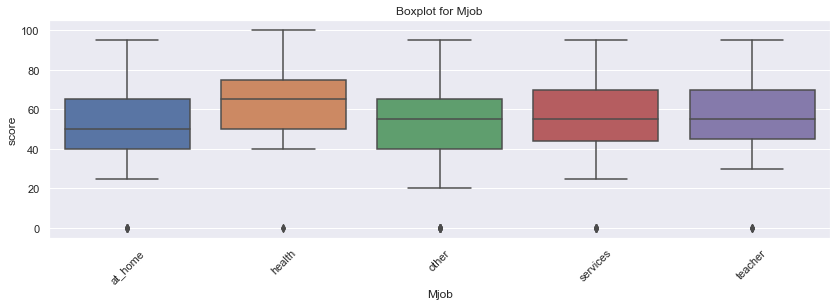

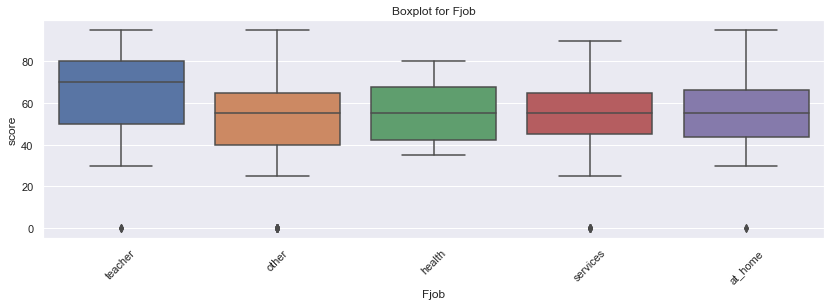

In [128]:
for col in ['Mjob', 'Fjob']:
    get_boxplot(col)

In [129]:
std_math

,age,address,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score,addressnum,internetnum,Fjobnum,Mjobnum,reasonnum,schoolsupnum,Pstatusnum
0,18,U,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0,1,0,1,4,1,1,2
1,17,U,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0,1,1,5,4,1,2,0
2,15,U,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0,1,1,5,4,4,1,1
3,15,U,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0,1,1,0,2,3,2,1
4,16,U,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0,1,2,5,5,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,U,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0,1,2,3,3,1,2,2
391,17,U,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0,1,1,3,3,1,2,1
392,21,R,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0,2,2,5,5,1,0,1
393,18,R,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0,2,1,5,3,1,2,1


Посмотрим на зависимость с наиболее кореллированным признаком Medu.
Видим, что тут нет смысла усложнять, для всех значений Medu наиболее вероятное значение Fjob - other
Поэтому, просто заполняем пропуски other

In [130]:
pivot = std_math.pivot_table(values=['score'],
index=['Fjob'],
columns=['Medu'],
aggfunc='count')
display(pivot)

score                        
Medu       0.0   1.0   2.0   3.0   4.0
Fjob                                  
at_home    1.0   4.0   5.0   NaN   4.0
health     NaN   1.0   4.0   3.0   7.0
other      2.0  23.0  50.0  51.0  50.0
services   NaN  13.0  23.0  24.0  29.0
teacher    NaN   1.0   1.0   NaN  24.0

In [131]:
stud_math.loc[stud_math['Fjob'].isnull()==True]

,school,sex,age,address,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score,Mjobnum
3,GP,F,15,U,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0,2
17,GP,F,16,U,T,3.0,3.0,other,NaN,reputation,mother,3.0,NaN,0.0,yes,NaN,no,yes,yes,NaN,yes,no,no,5.0,3.0,2.0,4.0,4.0,50.0,5
22,GP,M,16,U,T,4.0,2.0,teacher,NaN,course,mother,1.0,2.0,0.0,no,NaN,no,yes,NaN,-6.0,yes,yes,no,4.0,5.0,1.0,5.0,2.0,80.0,1
26,GP,M,15,U,T,2.0,2.0,other,NaN,home,mother,NaN,1.0,0.0,no,yes,NaN,no,yes,-3.0,yes,yes,NaN,4.0,2.0,2.0,5.0,2.0,55.0,5
31,GP,M,15,U,T,4.0,4.0,services,NaN,reputation,mother,2.0,2.0,0.0,no,yes,NaN,yes,yes,-6.0,yes,yes,no,4.0,3.0,1.0,5.0,0.0,85.0,3
44,GP,F,16,U,T,2.0,2.0,other,NaN,course,father,2.0,2.0,1.0,yes,no,no,NaN,yes,-6.0,yes,yes,no,4.0,3.0,3.0,5.0,14.0,45.0,5
47,GP,M,16,U,T,4.0,3.0,health,NaN,reputation,mother,1.0,4.0,0.0,no,no,no,yes,yes,-12.0,yes,yes,no,4.0,2.0,2.0,2.0,4.0,100.0,2
52,GP,M,15,U,A,4.0,2.0,health,NaN,other,father,2.0,1.0,1.0,no,NaN,no,no,yes,-3.0,yes,NaN,no,5.0,5.0,5.0,5.0,6.0,50.0,2
59,GP,F,16,U,T,4.0,2.0,health,NaN,course,mother,NaN,2.0,0.0,no,NaN,no,no,yes,-6.0,yes,yes,no,4.0,2.0,3.0,5.0,2.0,80.0,2
68,GP,F,15,R,T,2.0,2.0,health,NaN,reputation,mother,NaN,2.0,NaN,yes,yes,NaN,no,yes,-6.0,yes,yes,no,4.0,1.0,3.0,4.0,2.0,40.0,2


In [132]:
def set_Fjob(raw):
    if not pd.isnull(raw['Fjob']):
        return raw['Fjob']   
    else:
        return 'other' 
std_math['Fjob'] = std_math.apply(set_Fjob, axis = 1) 
stud_math['Fjob'] = stud_math.apply(set_Fjob, axis = 1) 

In [133]:
std_math['Fjobnum'] = std_math.Fjob.astype(str).apply(lambda x: 1 if x.strip() == 'teacher' 
                                                           else 2 if x.strip() == 'health' 
                                                           else 3 if x.strip() == 'services'
                                                           else 4 if x.strip() == 'at_home'
                                                           else 5 if x.strip() == 'other'
                                                           else 0)

In [134]:
stud_math['Fjobnum'] = std_math.Fjob.astype(str).apply(lambda x: 1 if x.strip() == 'teacher' 
                                                           else 2 if x.strip() == 'health' 
                                                           else 3 if x.strip() == 'services'
                                                           else 4 if x.strip() == 'at_home'
                                                           else 5 if x.strip() == 'other'
                                                           else 0)

## reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

17 пропусков, 4%

In [135]:
std_math.reason.value_counts()

course        119
reputation     96
home           89
other          33
Name: reason, dtype: int64

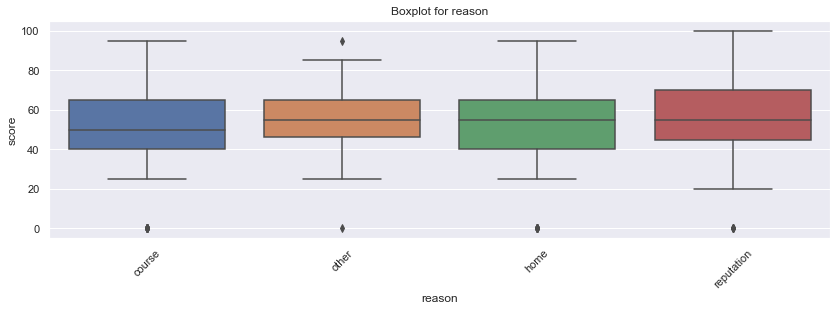

In [136]:
for col in ['reason']:
    get_boxplot(col)

Судя по графику этот признак не особенно полезен для предсказания значения целевого признака
Добавим числовой эквивалент данного признака, чтобы посмотреть корелляцию:

In [137]:
std_math['reasonnum'] = std_math.Fjob.astype(str).apply(lambda x: 1 if x.strip() == 'course' 
                                                           else 2 if x.strip() == 'reputation' 
                                                           else 3 if x.strip() == 'home'
                                                           else 4 if x.strip() == 'other'                                                           
                                                           else 0)

In [138]:
abs(cr['reasonnum']).sort_values(ascending = False)

reasonnum              1.000000
absences               0.104810
Medu                   0.075997
goout                  0.068496
health                 0.062870
famrel                 0.034162
studytime              0.033374
studytime, granular    0.033374
internetnum            0.030464
schoolsupnum           0.030282
score                  0.029403
freetime               0.019058
traveltime             0.018306
Mjobnum                0.018035
Fedu                   0.012229
addressnum             0.008321
Fjobnum                0.004000
failures               0.001149
Pstatusnum             0.000690
age                    0.000423
Name: reasonnum, dtype: float64

Похоже, признак ни с чем некореллируется и бесполезен для нас.

In [139]:
pivot = std_math.pivot_table(values=['score'],
index=['reason'],
columns=['studytime'],
aggfunc='count')
display(pivot)

score                  
studytime    1.0   2.0   3.0   4.0
reason                            
course      37.0  56.0  20.0   5.0
home        24.0  47.0  13.0   4.0
other       13.0  13.0   6.0   NaN
reputation  11.0  52.0  16.0  14.0

## guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

Пропусков 7.85% всего 31

In [140]:
std_math.guardian.value_counts()

mother    225
father     78
other      20
Name: guardian, dtype: int64

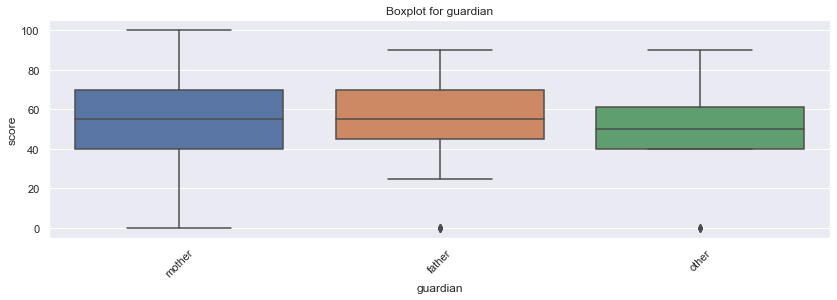

In [141]:
for col in ['guardian']:
    get_boxplot(col)

In [142]:
fgrd = pd.DataFrame(std_math.guardian.value_counts().sort_index())
print("%5s%10s  %5s        %4s" % ('guardian', 'count', 'mean', 'std'))
for index, row in fgrd.iterrows():
    print("%8s%10d   %5f   %5f" % (index, row[0], 
                                round(std_math.loc[std_math['guardian']==index]['score'].mean(), 2),
                                round(std_math.loc[std_math['guardian']==index]['score'].std(),2)))

guardian     count   mean         std
  father        78   58.910000   15.490000
  mother       225   57.980000   17.150000
   other        20   54.750000   13.910000


Делаем вывод, что целевой признак не демонстрирует зависимости от этого признака

Создадим числовой признак, соответствующий рассматриваемому и посмотрим на корелляцию с другими признаками

In [143]:
std_math['guardiannum'] = std_math.guardian.astype(str).apply(lambda x: 1 if x.strip() == 'father' 
                                                           else 2 if x.strip() == 'mother' 
                                                           else 3 if x.strip() == 'other'                                                                                                                      
                                                           else 0)

In [144]:
cr = std_math.corr()
abs(cr['guardiannum']).sort_values(ascending = False)

guardiannum            1.000000
health                 0.105210
Fedu                   0.103232
Fjobnum                0.091942
reasonnum              0.086228
age                    0.068879
Mjobnum                0.065567
Pstatusnum             0.058348
goout                  0.056047
internetnum            0.048100
failures               0.041681
schoolsupnum           0.037877
famrel                 0.033472
absences               0.032460
addressnum             0.032243
Medu                   0.025585
freetime               0.015250
traveltime             0.010553
studytime, granular    0.006726
studytime              0.006726
score                  0.002400
Name: guardiannum, dtype: float64

Целевой признак на последнем месте, что подтверждает предыдущие выводы. Есть небольшая корелляция с Fedu и health.
Пока не будем заполнять пропуски, скорее всего это кандидат на удаление

## traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

Пропуски в значениях: 7% или 28 строк

In [145]:
std_math.traveltime.value_counts()

1.0    219
2.0     86
3.0     17
4.0      7
Name: traveltime, dtype: int64

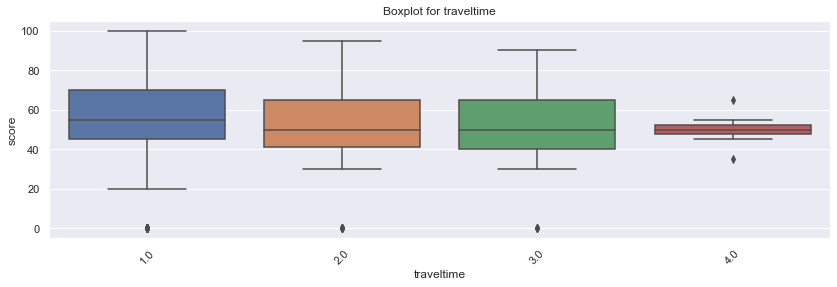

In [146]:
for col in ['traveltime']:
    get_boxplot(col)

In [147]:
ftrv = pd.DataFrame(std_math.traveltime.value_counts().sort_index())
print("%5s%10s %5s       %4s" % ('traveltime', 'count', 'mean', 'std'))
for index, row in ftrv.iterrows():
    print("%8s%10d   %5f   %5f" % (index, row[0], 
                                std_math.loc[std_math['traveltime']==index]['score'].mean(),
                                std_math.loc[std_math['traveltime']==index]['score'].std()))

traveltime     count  mean        std
     1.0       219   58.470320   16.729439
     2.0        86   56.569767   15.151424
     3.0        17   57.352941   14.696688
     4.0         7   50.000000   9.128709


статистика по значению признака 4 слишком мала и ее можно не принимать во внимание. Для остальных случаев влияние признака несущественно.

In [148]:
abs(cr['traveltime']).sort_values(ascending = False)

traveltime             1.000000
addressnum             0.275203
Medu                   0.163961
Fedu                   0.155343
Pstatusnum             0.135371
studytime              0.101490
studytime, granular    0.101490
age                    0.095370
failures               0.091757
Mjobnum                0.082569
reasonnum              0.080203
Fjobnum                0.078571
score                  0.075516
schoolsupnum           0.054677
absences               0.047560
internetnum            0.036869
goout                  0.029374
famrel                 0.023920
freetime               0.023067
guardiannum            0.010553
health                 0.000092
Name: traveltime, dtype: float64

Видим хорошую корелляцию с addressnum, что мы уже использовали для восстановления значений addressnum и с рядом других,
но пока нет причин считать этот признак нужным.

## studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

Пропусков 1.77%	7

In [149]:
std_math.studytime.value_counts()

2.0    173
1.0     90
3.0     58
4.0     24
Name: studytime, dtype: int64

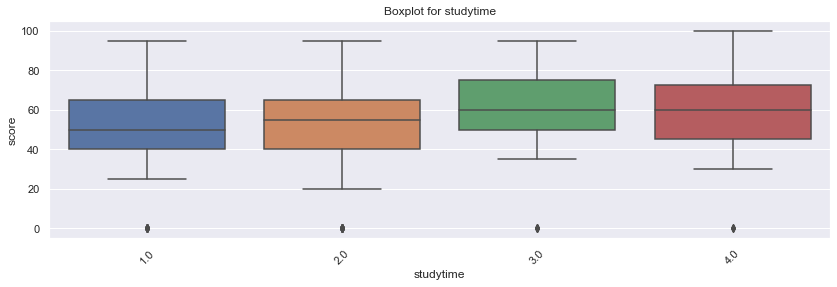

In [150]:
for col in ['studytime']:
    get_boxplot(col)

Графики демонстрируют некоторую корелляцию с целевым признаком, во всяком случае в разрезе значений 1 или 2.

In [151]:
fstd = pd.DataFrame(std_math.studytime.value_counts().sort_index())
print("%5s%10s   %5s    %4s" % ('studytime', 'count', 'mean', 'std'))
for index, row in fstd.iterrows():
    print("%8s%10d   %5f  %5f" % (index, row[0], 
                                std_math.loc[std_math['studytime']==index]['score'].mean(),
                                std_math.loc[std_math['studytime']==index]['score'].std()))

studytime     count    mean     std
     1.0        90   56.611111  16.503792
     2.0       173   55.520231  15.627045
     3.0        58   62.758621  15.077938
     4.0        24   63.333333  17.977442


Видим, что для значений 1 и 2 среднее значение отличается от 3 и 4

Посмотрим, что с корелляцией:

In [152]:
abs(cr['studytime']).sort_values(ascending = False)

studytime              1.000000
studytime, granular    1.000000
failures               0.156406
score                  0.142055
freetime               0.128661
traveltime             0.101490
health                 0.085469
Medu                   0.069814
schoolsupnum           0.068663
famrel                 0.063856
addressnum             0.063645
Mjobnum                0.039561
internetnum            0.037659
absences               0.030187
goout                  0.029686
Fjobnum                0.027860
reasonnum              0.024851
Fedu                   0.020168
age                    0.011426
Pstatusnum             0.008961
guardiannum            0.006726
Name: studytime, dtype: float64

Видим, что есть корелляция с целевым признаком. Пропуски можно восстанавливать по (studytime, granular).
С ним абсолютная корелляция. При отсутствии значений в (studytime, granular) можно восстанавливать по failures

Посмотрим с помощью сводной таблицы как связаны признаки 'studytime, granular' и 'studytime' и почему у них абсолютная корелляция:

In [153]:
pivot = std_math.pivot_table(values=['score'],
index=['studytime, granular'],
columns=['studytime'],
aggfunc='count')
display(pivot)

score                   
studytime             1.0    2.0   3.0   4.0
studytime, granular                         
-12.0                 NaN    NaN   NaN  24.0
-9.0                  NaN    NaN  58.0   NaN
-6.0                  NaN  173.0   NaN   NaN
-3.0                 90.0    NaN   NaN   NaN

Видим, однозначное соответсвие. По сути эти признаки дублирую друг друга. Мы восстановим недостающие значения 'studytime' по 'studytime, granular', а потом удалим последний. Проверим, есть ли строки у которых оба этих признака пустые:

In [154]:
stud_math.loc[(stud_math['studytime'].isnull()==True)&(stud_math['studytime, granular'].isnull()==True)]

,school,sex,age,address,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score,Mjobnum,Fjobnum
17,GP,F,16,U,T,3.0,3.0,other,other,reputation,mother,3.0,NaN,0.0,yes,NaN,no,yes,yes,NaN,yes,no,no,5.0,3.0,2.0,4.0,4.0,50.0,5,5.0
91,GP,F,15,U,T,4.0,3.0,services,other,reputation,mother,1.0,NaN,NaN,no,no,yes,yes,yes,NaN,yes,yes,no,4.0,5.0,5.0,1.0,4.0,90.0,3,5.0
112,GP,F,16,U,NaN,2.0,2.0,at_home,other,NaN,mother,NaN,NaN,1.0,yes,no,no,yes,yes,NaN,yes,yes,NaN,3.0,1.0,2.0,5.0,6.0,65.0,4,5.0
129,GP,M,16,R,T,4.0,4.0,teacher,teacher,course,mother,1.0,NaN,0.0,no,no,yes,yes,yes,NaN,yes,yes,no,3.0,5.0,5.0,4.0,NaN,90.0,1,1.0
227,GP,M,17,U,NaN,2.0,3.0,services,services,reputation,father,1.0,NaN,0.0,no,yes,yes,no,no,NaN,NaN,yes,no,5.0,3.0,3.0,3.0,NaN,60.0,3,3.0
266,GP,M,17,U,NaN,3.0,1.0,services,other,other,mother,1.0,NaN,0.0,no,no,yes,yes,yes,NaN,yes,yes,NaN,5.0,4.0,4.0,NaN,2.0,50.0,3,5.0
314,GP,F,19,U,T,1.0,1.0,at_home,health,home,other,1.0,NaN,2.0,no,no,no,no,no,NaN,yes,yes,yes,4.0,NaN,2.0,3.0,14.0,65.0,4,2.0


К сожалению, признаки дублируют друг друга буквально даже в части пропусков данных. Поэтому признак 'studytime, granular' смело удаляем, значения 'studytime' восстановим по failures и freetime

In [155]:
stud_math = stud_math.drop('studytime, granular', 1) 

In [156]:
std_math = std_math.drop('studytime, granular', 1) 

In [157]:
pivot = std_math.pivot_table(values=['Medu'],
index=['freetime'],
columns=['studytime'],
aggfunc='count')
display(pivot)

Medu            
studytime  1.0 2.0 3.0 4.0
freetime                  
1.0          2   8   2   3
2.0         18  27   9   5
3.0         28  66  26  10
4.0         25  55  19   2
5.0         16  13   1   3

In [158]:
pivot = std_math.pivot_table(values=['Medu'],
index=['failures'],
columns=['studytime'],
aggfunc='count')
display(pivot)

Medu                   
studytime   1.0    2.0   3.0   4.0
failures                          
0.0        63.0  136.0  49.0  21.0
1.0        13.0   18.0   5.0   1.0
2.0         2.0    6.0   2.0   NaN
3.0         6.0    4.0   NaN   NaN

Видим, что наиболее вероятным значением studytime является 2, но если freetime = 5 или failures = 3, то можно поставить 1.

In [159]:
def set_studytime(raw):
    if not pd.isnull(raw['studytime']):
        return raw['studytime']   
    elif raw['freetime'] == 5 or raw['failures'] == 3:
        return 1
    else:
        return 2
std_math['studytime'] = std_math.apply(set_studytime, axis = 1) 
stud_math['studytime'] = stud_math.apply(set_studytime, axis = 1) 

In [160]:
stud_math.loc[(stud_math['studytime'].isnull()==True)]

,school,sex,age,address,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score,Mjobnum,Fjobnum


Снова посчитаем средние значения по подвыборкам значений studytime

In [161]:
fstd = pd.DataFrame(std_math.studytime.value_counts().sort_index())
print("%5s%10s  %5s    %4s" % ('studytime', 'count', 'mean', 'std'))
for index, row in fstd.iterrows():
    print("%8s%10d   %5f%   5f" % (index, row[0], 
                                round(std_math.loc[std_math['studytime']==index]['score'].mean(), 2),
                                round(std_math.loc[std_math['studytime']==index]['score'].std(), 2)))

studytime     count   mean     std
     1.0        92   57.340000 17.040000
     2.0       178   55.590000 15.450000
     3.0        58   62.760000 15.080000
     4.0        24   63.330000 17.980000


Есть гипотеза, что целевой признак зависит от studytime. Мы видим, что средние значения целевого признака для значений 1 и 2 очевидно близки 57 и 55. Для значения 4 выборка меньше 30. Для значения 0, значение 62.
Протестируем гипотезу об истинном среднем для выборки для studytime = 3.
Нулевой гипотезой будем считать предположение, что истинное среднее равно X = 55.59, как для выборки для studytime = 2. Почему я не беру 57.34 для studytime = 1? Потому что выборка для studytime = 2 почти в два раза больше и значение истинного среднего точнее.
Альтернативной гипотезой будем считать, что истинное среднее больше 57.34. Уровень значимости возьмем 0.05.
У нас случайная выборка n = 58, X = 62.76, s = 15.08

In [162]:
n  = 58
X  = 62.76 
X0 = 55.59
s  = 15.08
ts = (X-X0)*n**0.5/s
ts


3.621027398477731

In [163]:
pvalue = 1-t.cdf(ts, n-1)
pvalue

0.0003124961766212131

Получаем значение pvalue меньше порогового значения и отвергаем нулевую гипотезу. Следовательно, мы действительно имеем зависимость целевого признака от  studytime 

## failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

5.57 % или 22 пропуска

Применим сразу весь уже испытанный набор инструментов анализа: 

In [164]:
std_math.failures.value_counts()

0.0    273
1.0     38
2.0     11
3.0     10
Name: failures, dtype: int64

In [165]:
std_math.failures.value_counts(normalize=True)

0.0    0.822289
1.0    0.114458
2.0    0.033133
3.0    0.030120
Name: failures, dtype: float64

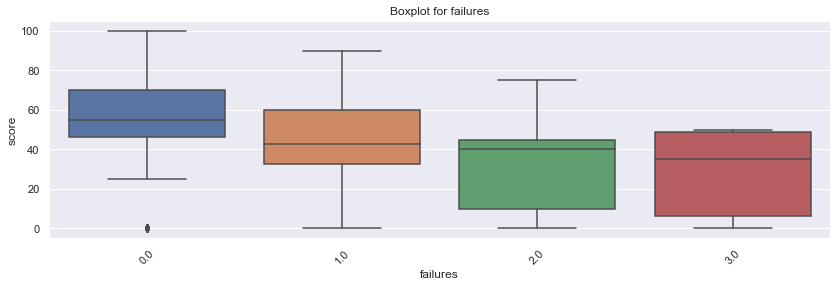

In [166]:
for col in ['failures']:
    get_boxplot(col)

In [167]:
fflr = pd.DataFrame(std_math.failures.value_counts().sort_index())
print("%5s%10s  %5s        %4s" % ('failures', 'count', 'mean', 'std'))
for index, row in fflr.iterrows():
    print("%8s%10d   %5f    %5f" % (index, row[0], 
                                round(std_math.loc[std_math['failures']==index]['score'].mean(), 2),
                                round(std_math.loc[std_math['failures']==index]['score'].std(), 2)))

failures     count   mean         std
     0.0       273   59.540000    15.990000
     1.0        38   50.530000    13.290000
     2.0        11   44.090000    15.780000
     3.0        10   41.500000    8.830000


In [168]:
cr = std_math.corr()
abs(cr['failures']).sort_values(ascending = False)

failures        1.000000
score           0.289377
Fedu            0.256076
age             0.235875
Medu            0.204999
studytime       0.152885
freetime        0.127391
goout           0.126770
addressnum      0.092352
traveltime      0.091757
absences        0.089541
Mjobnum         0.080254
internetnum     0.076188
schoolsupnum    0.075448
health          0.064083
guardiannum     0.041681
Fjobnum         0.029128
famrel          0.011414
reasonnum       0.003755
Pstatusnum      0.003524
Name: failures, dtype: float64

Все говорит за очень хорошую корелляцию с целевым признаком. 
Для предыдущего признака я сначала производил заполнение пропущенных значений, а потом тестировал гипотезу
о зависимости истинного среднего значения целевого признака от значений исследуемого признака.
Но, есть мысль, что это неправильная стратегия. Для предыдущего признака это было допустимо, 
потому что число пропущенных значений было меньше 2%, здесь же уже 5.6%. Интересно сначала протестировать гипотезу,
затем заполнить пустые значение и снова выполнить тестирование гипотезы. 
Разница в двух тестированиях должна говорить о качестве восстановления пустых данных признака

Анализируя распределение средних значений целевого признака в зависимости от исследуемого, видим, что подвыборки для значений 
2 и 3 слишком малы, чтобы сделать по ним статистически значимые выводы. 
Поэтому проверим нулевую гипотезу, о том, что истинное среднее выборки failers = 1 X = 59.54(такое же как для failers = 0).
Альтернативной гипотезой будет X < 59.54. Уровень значимости возьмем 0.05.

У нас случайная выборка n = 38, X = 50.53, s = 13.29

n = 38
X = 50.53
X0 = 59.54
s = 13.29
ts = (X-X0)*n**0.5/s
ts


pvalue = t.cdf(ts, n-1)
pvalue

In [169]:
def test_hyp(n, X, X0, s, alh, tp):
    ts = (X-X0)*n**0.5/s
    if tp == 0:
        pvalue = t.cdf(ts, n-1)
    elif tp == 1:
        pvalue = 1 - t.cdf(ts, n-1)
    else:
        pvalue = 2*t.cdf(ts, n-1)
    if pvalue < alh:
        print('Нулевая гипотеза отвергается')
    else:
        print('Нулевая гипотеза принимается')
    return pvalue

In [170]:
pv = test_hyp(38, 50.53, 59.54, 13.29, 0.05, 0)
pv

Нулевая гипотеза отвергается


8.574124208952504e-05

Получаем очень малое значение, намного меньше уровня значимости, следовательно, нулевая гипотеза отвергается

Можно было бы сделать подобную оценку "с обратной стороны". Т.е. взять более мощную выборку для failures = 0 и проверить гипотезу, что ее истинное среднее выше, чем истинное среднее выборки для failures = 1. Я считаю первый вариант более корректным, поскольку расчет от более малой выборки учитывает ее размер и, следовательно, делает поправку на ее малость.

Попробуем аналогично протестировать нулевую гипотезу о том, что X = 50.53, как для failures = 1 на выборке для failures = 2. 
Выборка очень мала(всего 11), поэтому это больше из любопытства.
Альтернативная гипотеза, что X < 50.53

In [171]:
n = 11
X = 44.09
X0 = 50.53
s = 15.78
ts = (X-X0)*(n**0.5)/s
ts

-1.3535528295240031

In [172]:
pvalue = t.cdf(ts, n-1)
pvalue

0.10284030077773432

In [173]:
pv = test_hyp(n, X, X0, s, 0.05, 0)
pv

Нулевая гипотеза принимается


0.10284030077773432

Видим, что на уровне значимости 0.05 нулевая гипотеза подтверждается и мы не можем утверждать, о том, 
что истинное среднее по score для failures = 2 отличется от истинного для failures = 1.
Но учитывая критическую малость выборки и явную зависимость целевого признака от значений failures 0 и 1, 
я рискну утверждать что это не так. 

Здесь имеет смысл проверить обратный вариант и проверить на выборке failures = 1 нулевую гипотезу, что его 
истинное среднее равно истинному среднему при failures = 2, а альтернативной гипотезой будет, что истинное среднее
больше 44.09

In [174]:
n = 38
X = 50.53
X0 = 44.09
s = 13.29
ts = (X-X0)*(n**0.5)/s
ts

2.987120103771271

In [175]:
pvalue = 1- t.cdf(ts, n-1)
pvalue

0.002487711337741838

In [176]:
pv = test_hyp(n, X, X0, s, 0.05, 1)
pv

Нулевая гипотеза отвергается


0.002487711337741838

В данном случае, гипотеза отвергается. Согласен, что это не очень корректно, но косвенно подтверждает мой последний вывод
о зависимости score от failures

Теперь займемся заполнением пропусков. Первый кандидат из полей по которым можно было бы восстановить пропущенные значений
Fedu:

In [177]:
pivot = std_math.pivot_table(values=['Medu'],
index=['Fedu'],
columns=['failures'],
aggfunc='count')
display(pivot)

Medu                
failures   0.0   1.0  2.0  3.0
Fedu                          
0.0        1.0   NaN  NaN  NaN
1.0       43.0  12.0  2.0  9.0
2.0       77.0   9.0  5.0  1.0
3.0       75.0  11.0  3.0  NaN
4.0       77.0   6.0  1.0  NaN

Но видим, что количество строк  с failures = 0, является наибольшим для любого значения Fedu.
У нас нет зависимости непосредставенно от Fedu. Но мы знаем, что значений с failures = 0 около 82% отобщего количества строк.
с 1 - 12%, с 2 и 3 по 3%. 

In [178]:
std_math.failures.value_counts(normalize=True)

0.0    0.822289
1.0    0.114458
2.0    0.033133
3.0    0.030120
Name: failures, dtype: float64

Попробуем использовать признак age. У нас 22 пропуска в failures, значит примерно 18 из них должны быть со значением 0. Остальные путь будут 1.
тогда для значений age 15, 16, 17 поставим failures = 0, для остальных 1

In [179]:
stud_math.loc[stud_math['failures'].isnull()==True]['age'].value_counts()

15    8
16    6
17    4
19    2
18    2
Name: age, dtype: int64

In [180]:
def set_failures(raw):
    if not pd.isnull(raw['failures']):
        return raw['failures']   
    elif raw['age'] in (15, 16, 17):
        return 0 
    else:
        return 1
std_math['failures'] = std_math.apply(set_failures, axis = 1) 
stud_math['failures'] = stud_math.apply(set_failures, axis = 1) 

In [181]:
stud_math.loc[stud_math['failures'].isnull()==True]

,school,sex,age,address,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score,Mjobnum,Fjobnum


In [182]:
fflr = pd.DataFrame(std_math.failures.value_counts().sort_index())
print("%5s%10s  %5s        %4s" % ('failures', 'count', 'mean', 'std'))
for index, row in fflr.iterrows():
    print("%8s%10d   %5f    %5f" % (index, row[0], 
                                round(std_math.loc[std_math['failures']==index]['score'].mean(), 2),
                                round(std_math.loc[std_math['failures']==index]['score'].std(), 2)))

failures     count   mean         std
     0.0       290   59.880000    16.000000
     1.0        41   50.370000    12.910000
     2.0        11   44.090000    15.780000
     3.0        10   41.500000    8.830000


После дополнения данных, еще раз проверим гипотезу о том, что истинное среднее по выборке для failures = 1 такое же как для failures = 0. Альтернативной гипотезой будет утверждение, что истинное среднее по выборке для failures = 1 меньше, чем для failures = 0

In [183]:
n = 41
X = 50.37
X0 = 59.88
s = 12.91

pv = test_hyp(n, X, X0, s, 0.05, 0)
pv

Нулевая гипотеза отвергается


1.4530071618688395e-05

Основной вывод по данному признаку, что у него есть корелляция с целевым и он нам нужен

## schoolsup — дополнительная образовательная поддержка (yes или no)

Пропуски: 2.3%	 всего 9

In [184]:
std_math.schoolsup.value_counts()

no     295
yes     48
Name: schoolsup, dtype: int64

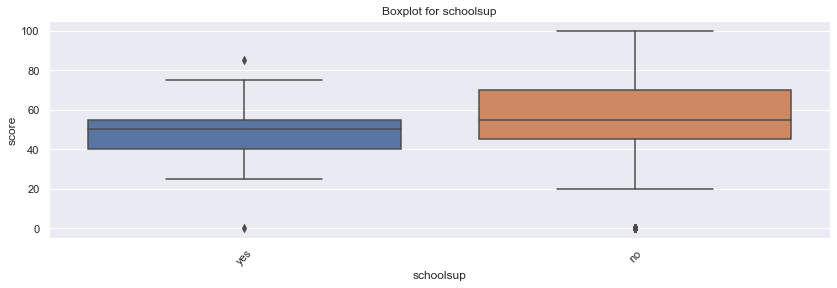

In [185]:
for col in ['schoolsup']:
    get_boxplot(col)

In [186]:
fsup = pd.DataFrame(std_math.schoolsup.value_counts().sort_index())
print("%5s%10s  %5s        %4s" % ('schoolsup', 'count', 'mean', 'std'))
for index, row in fsup.iterrows():
    print("%8s%10d   %5f    %5f" % (index, row[0], 
                                round(std_math.loc[std_math['schoolsup']==index]['score'].mean(), 2),
                                round(std_math.loc[std_math['schoolsup']==index]['score'].std(), 2)))

schoolsup     count   mean         std
      no       295   59.610000    16.010000
     yes        48   48.020000    13.040000


На глаз видим неплохую корелляцию с целевым признаком:
Проверим гипотезу о равенстве средних значений для yes и no, и видим, что она не подтверждается

In [187]:
n = 48
X = 48.02
X0 = 59.61
s = 13.04

pv = test_hyp(n, X, X0, s, 0.05, 0)
pv

Нулевая гипотеза отвергается


7.761820132814652e-08

Создадим дублирующий числовой признак, чтобы посмотреть корелляцию с другими признаками

In [188]:
std_math['schoolsupnum'] = std_math.schoolsup.astype(str).apply(lambda x: 1 if x.strip() == 'yes' else 2 if x.strip() == 'no' else 0)

In [189]:
cr = std_math.corr()
abs(cr['schoolsupnum']).sort_values(ascending = False)

schoolsupnum    1.000000
score           0.244037
age             0.159742
Mjobnum         0.149595
Medu            0.095198
failures        0.072856
absences        0.071486
internetnum     0.070757
studytime       0.065051
traveltime      0.054677
addressnum      0.047103
health          0.045966
famrel          0.045895
Fjobnum         0.044060
guardiannum     0.037877
freetime        0.027526
reasonnum       0.025619
goout           0.021305
Pstatusnum      0.017924
Fedu            0.016013
Name: schoolsupnum, dtype: float64

Как и ожидалось, видим неплохую корелляцию с целевым признаком, а также с age, Mjobnum и Medu

In [190]:
pivot = std_math.pivot_table(values=['Medu'],
index=['age'],
columns=['schoolsup'],
aggfunc='count')
display(pivot)

Medu      
schoolsup    no   yes
age                  
15         52.0  22.0
16         77.0  17.0
17         82.0   5.0
18         66.0   3.0
19         14.0   1.0
20          3.0   NaN
22          1.0   NaN

Значений yes, в принципе меньше, но замечаем, что для возрастов 15 и 16 процент yes высокий, порядка 20%
Заполним пустующие значения по следующему правилу: Если age 15, 16 то yes, иначе no

In [191]:
std_math.loc[std_math['schoolsup'].isnull()==True]['age']

27     15
35     15
79     16
151    16
211    17
274    17
321    17
392    21
394    19
Name: age, dtype: int64

In [192]:
def set_schoolsup(raw):
    if not pd.isnull(raw['schoolsup']):
        return raw['schoolsup']   
    elif raw['age'] in (15, 16):
        return 'yes' 
    else:
        return 'no'
std_math['schoolsup'] = std_math.apply(set_schoolsup, axis = 1) 
stud_math['schoolsup'] = stud_math.apply(set_schoolsup, axis = 1) 

In [193]:
std_math.loc[std_math['schoolsup'].isnull()==True]['age']

Series([], Name: age, dtype: int64)

In [194]:
std_math['schoolsupnum'] = std_math.schoolsup.astype(str).apply(lambda x: 1 if x.strip() == 'yes' else 2 if x.strip() == 'no' else 0)

Вывод - признак значим для предсказания значений целевого признака

## famsup — семейная образовательная поддержка (yes или no)

Высокий процент пропусков: 9.87%  всего	39

In [195]:
std_math.famsup.value_counts()

yes    196
no     120
Name: famsup, dtype: int64

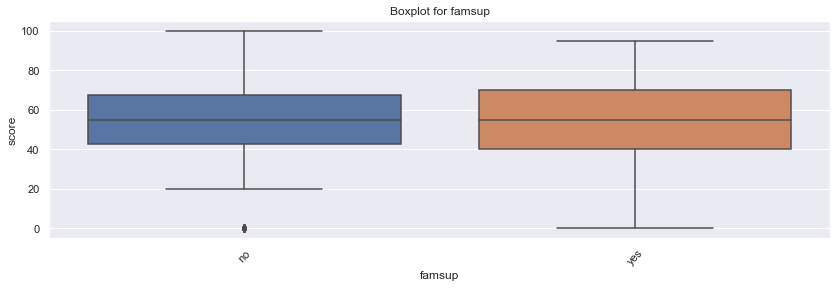

In [196]:
for col in ['famsup']:
    get_boxplot(col)

In [197]:
fsup = pd.DataFrame(std_math.famsup.value_counts().sort_index())
print("%5s%10s  %5s        %4s" % ('famsup', 'count', 'mean', 'std'))
for index, row in fsup.iterrows():
    print("%8s%10d   %5f    %5f" % (index, row[0], 
                                round(std_math.loc[std_math['famsup']==index]['score'].mean(), 2),
                                round(std_math.loc[std_math['famsup']==index]['score'].std(), 2)))

famsup     count   mean         std
      no       120   58.580000    16.250000
     yes       196   56.990000    16.710000


Навскидку корелляция не очень. Проверим гипотезу, что для famsup yes истинное среднее такое же как и для no

In [198]:
n = 196
X = 56.99
X0 = 58.58
s = 16.71

pv = test_hyp(n, X, X0, s, 0.05, 0)
pv

Нулевая гипотеза принимается


0.09218507206321583

Да, видим, что так и есть. 
Глаз не обманул, значения средних слишком близкие и зависмимость целевого признака от данного отсутствует

Но посмотрим на корелляцию с другими признаками

In [199]:
std_math['famsupnum'] = std_math.famsup.astype(str).apply(lambda x: 1 if x.strip() == 'yes' else 2 if x.strip() == 'no' else 0)

In [200]:
cr = std_math.corr()
abs(cr['famsupnum']).sort_values(ascending = False)

famsupnum       1.000000
Mjobnum         0.145784
Medu            0.142972
absences        0.129781
Fedu            0.129675
age             0.086685
freetime        0.084892
schoolsupnum    0.082567
addressnum      0.079287
studytime       0.078506
Pstatusnum      0.066120
health          0.056231
traveltime      0.050542
goout           0.024203
famrel          0.022753
reasonnum       0.015214
score           0.013711
internetnum     0.012006
guardiannum     0.008527
failures        0.005642
Fjobnum         0.004852
Name: famsupnum, dtype: float64

Ничего интересущего нас не видим, есть небольшая корелляция с признаками по которым уже заполнены пропуски.

Как вывод: признак нам не нужен. Удаляем его:

In [201]:
stud_math = stud_math.drop('famsup', 1)

In [202]:
std_math = std_math.drop('famsup', 1)

In [203]:
std_math = std_math.drop('famsupnum', 1)

## paid — дополнительные платные занятия по математике (yes или no)

Большое количество пропусков в данных: 10.13%	40

In [204]:
std_math.paid.value_counts()

no     170
yes    146
Name: paid, dtype: int64

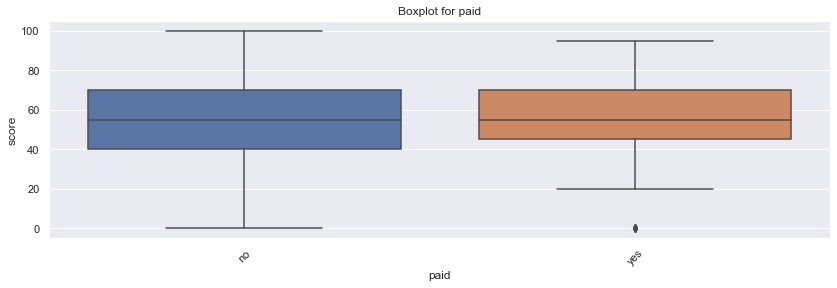

In [205]:
for col in ['paid']:
    get_boxplot(col)

In [206]:
fpaid = pd.DataFrame(std_math.paid.value_counts().sort_index())
print("%5s%10s  %5s        %4s" % ('paid', 'count', 'mean', 'std'))
for index, row in fpaid.iterrows():
    print("%5s%10d   %5f    %5f" % (index, row[0], 
                                round(std_math.loc[std_math['paid']==index]['score'].mean(), 2),
                                round(std_math.loc[std_math['paid']==index]['score'].std(), 2)))

 paid     count   mean         std
   no       170   58.350000    16.910000
  yes       146   57.640000    15.430000


Видим, что истинное среднее score по выборкам значений paid практически не меняется. 
Не будем тестировать гипотезы, поскольку я деkал проверку для аналогичных цифр для предыдущих признаков
Значения 58.35 и 57.64 слишком близки, чтобы здесь фиксировать какую то зависимость. 
Удаляем этот признак:

In [207]:
std_math = std_math.drop('paid', 1)
stud_math = stud_math.drop('paid', 1)

## activities — дополнительные внеучебные занятия (yes или no)

Пропуски: 3.54% или всего 14

In [208]:
std_math.activities.value_counts()

yes    172
no     168
Name: activities, dtype: int64

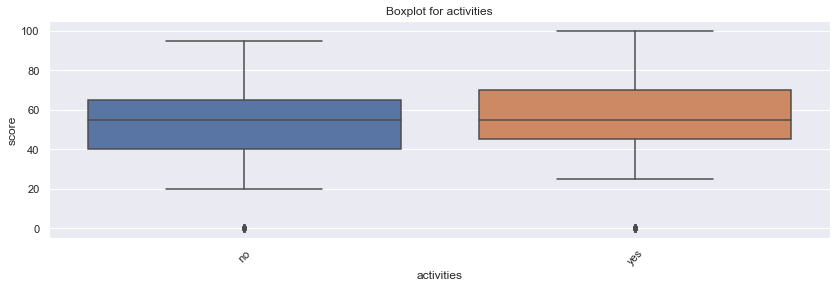

In [209]:
for col in ['activities']:
    get_boxplot(col)

In [210]:
fact = pd.DataFrame(std_math.activities.value_counts().sort_index())
print("%5s%10s  %5s        %4s" % ('paid', 'count', 'mean', 'std'))
for index, row in fact.iterrows():
    print("%5s%10d   %5f    %5f" % (index, row[0], 
                                round(std_math.loc[std_math['activities']==index]['score'].mean(), 2),
                                round(std_math.loc[std_math['activities']==index]['score'].std(), 2)))

 paid     count   mean         std
   no       168   56.850000    16.680000
  yes       172   58.810000    16.060000


Учитывая опыт анализа подобных признаков и видя порядок значений, делаем вывод о бесполезности данного признака для предсказания значений score.

In [211]:
std_math = std_math.drop('activities', 1)
stud_math = stud_math.drop('activities', 1)

## nursery — посещал детский сад (yes или no)

Пропуски 4.05% или	16

In [212]:
std_math.nursery.value_counts()

yes    272
no      68
Name: nursery, dtype: int64

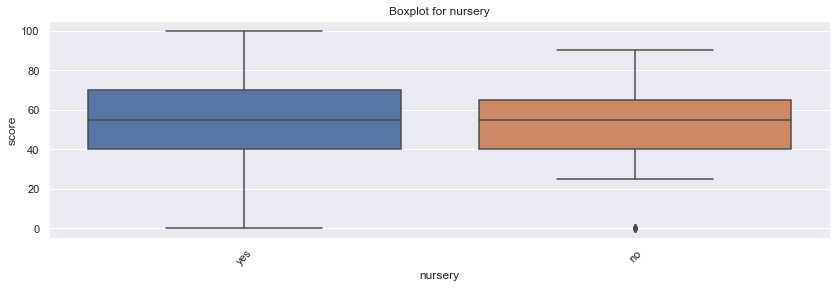

In [213]:
for col in ['nursery']:
    get_boxplot(col)

In [214]:
nrs = pd.DataFrame(std_math.nursery.value_counts().sort_index())
print("%5s%10s  %5s        %4s" % ('nursery', 'count', 'mean', 'std'))
for index, row in nrs.iterrows():
    print("%5s%10d   %5f    %5f" % (index, row[0], 
                                round(std_math.loc[std_math['nursery']==index]['score'].mean(), 2),
                                round(std_math.loc[std_math['nursery']==index]['score'].std(), 2)))

nursery     count   mean         std
   no        68   56.620000    13.910000
  yes       272   57.830000    16.810000


Так же делаем вывод, что признак не влияет на целевой и удаляем его.

In [215]:
std_math = std_math.drop('nursery', 1)
stud_math = stud_math.drop('nursery', 1)

## higher — хочет получить высшее образование (yes или no)

Пропуски 5.06%	20

In [216]:
stud_math.higher.value_counts()

yes    356
no      19
Name: higher, dtype: int64

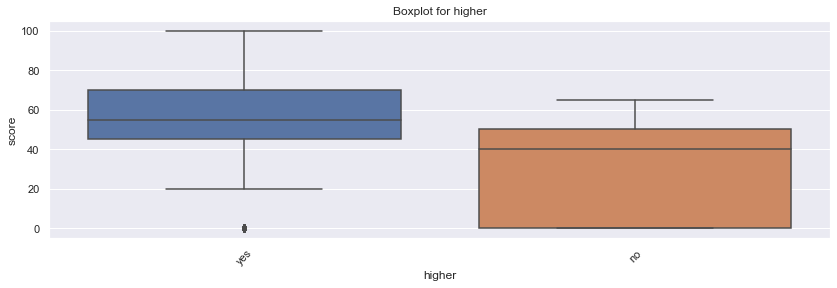

In [217]:
for col in ['higher']:
    get_boxplot(col)

In [218]:
hg = pd.DataFrame(std_math.higher.value_counts().sort_index())
print("%5s%10s  %5s        %4s" % ('higher', 'count', 'mean', 'std'))
for index, row in hg.iterrows():
    print("%5s%10d   %5f    %5f" % (index, row[0], 
                                round(std_math.loc[std_math['higher']==index]['score'].mean(), 2),
                                round(std_math.loc[std_math['higher']==index]['score'].std(), 2)))

higher     count   mean         std
   no        13   49.230000    9.540000
  yes       320   58.080000    16.510000


Проверим гипотезу для выборки по значению no, что истинное среднее X0 = 58.08, альтернатиdная гипотеза, что 
X < X0

In [219]:
n = 13
X = 49.23
X0 = 58.08
s = 9.54

pv = test_hyp(n, X, X0, s, 0.05, 0)
pv

Нулевая гипотеза отвергается


0.0029181628060799803

Мы имеем очень малое количество нежелающих получать высшее образование. При этом, формально зависимость целевого признака
налицо и вряд ли она случайна. Но даже в этом случае неочевидно, что признак имеет смысл оставлять из-за ничтожного процента альтернативного значения. Но пока не удаляем 

## internet — наличие интернета дома (yes или no)

Пропуски: 8.61% всего 34    

In [220]:
std_math.internet.value_counts()

yes    274
no      49
Name: internet, dtype: int64

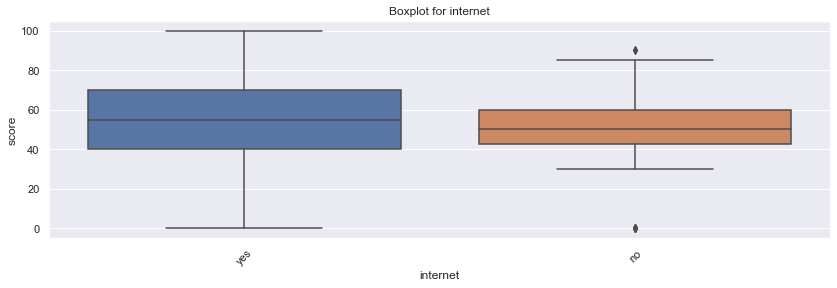

In [221]:
for col in ['internet']:
    get_boxplot(col)

In [222]:
intr = pd.DataFrame(std_math.internet.value_counts().sort_index())
print("%5s%10s  %5s        %4s" % ('internet', 'count', 'mean', 'std'))
for index, row in intr.iterrows():
    print("%5s%10d   %5f    %5f" % (index, row[0], 
                                round(std_math.loc[std_math['internet']==index]['score'].mean(), 2),
                                round(std_math.loc[std_math['internet']==index]['score'].std(), 2)))

internet     count   mean         std
   no        49   55.100000    14.420000
  yes       274   58.160000    16.420000


Проверим гипотезу для выборки по значению no, что истинное среднее X0 = 58.16, альтернатинаяч гипотеза, что 
X < X0

In [223]:
n = 49
X = 55.1
X0 = 58.16
s = 14.42

pv = test_hyp(n, X, X0, s, 0.05, 0)
pv

Нулевая гипотеза принимается


0.07198336864691672

Вопреки моим ожиданиям по уровню значимости 0.05 мы не можем признать наличие зависимости между признаками.
Признак можно удалить

In [224]:
std_math = std_math.drop('internet', 1)
stud_math = stud_math.drop('internet', 1)

И его числовой эквивалент

In [225]:
std_math = std_math.drop('internetnum', 1)

## romantic — в романтических отношениях (yes или no)

Пропуски 7.84% или	31

In [226]:
std_math.romantic.value_counts()

no     219
yes    104
Name: romantic, dtype: int64

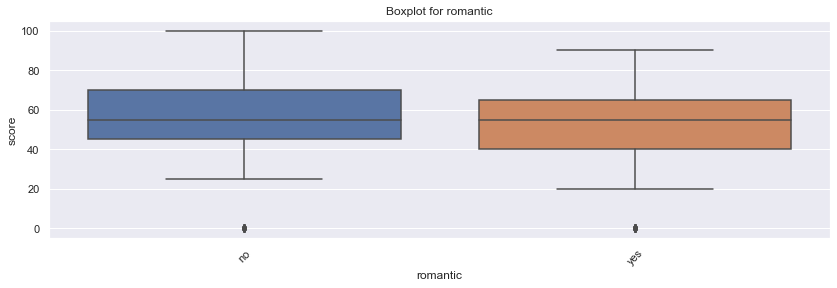

In [227]:
for col in ['romantic']:
    get_boxplot(col)

In [228]:
rom = pd.DataFrame(std_math.romantic.value_counts().sort_index())
print("%5s%10s  %5s        %4s" % ('romantic', 'count', 'mean', 'std'))
for index, row in rom.iterrows():
    print("%5s%10d   %5f    %5f" % (index, row[0], 
                                round(std_math.loc[std_math['romantic']==index]['score'].mean(), 2),
                                round(std_math.loc[std_math['romantic']==index]['score'].std(), 2)))

romantic     count   mean         std
   no       219   58.560000    17.060000
  yes       104   56.390000    14.790000


Проверим гипотезу для выборки по значению yes, что истинное среднее X0 = 58.56, альтернатинаяч гипотеза, что 
X < X0

In [229]:
n = 104
X = 56.39
X0 = 58.56
s = 14.79

pv = test_hyp(n, X, X0, s, 0.05, 0)
pv

Нулевая гипотеза принимается


0.06882141049851687

Зависимость слишком слабая или вовсе отсутствует. Удаляем признак

In [230]:
std_math = std_math.drop('romantic', 1)
stud_math = stud_math.drop('romantic', 1)

## famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

Пропуски:	6.84% всего	27

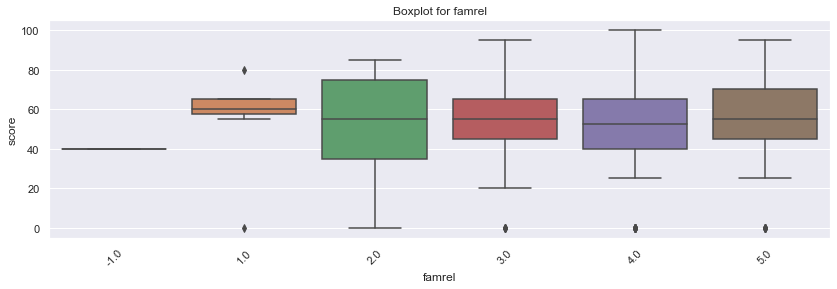

In [231]:
for col in ['famrel']:
    get_boxplot(col)

In [232]:
fmr = pd.DataFrame(std_math.famrel.value_counts().sort_index())
print("%5s%10s  %5s        %4s" % ('famrel', 'count', 'mean', 'std'))
for index, row in fmr.iterrows():
    print("%5s%10d   %5f    %5f" % (index, row[0], 
                                round(std_math.loc[std_math['famrel']==index]['score'].mean(), 2),
                                round(std_math.loc[std_math['famrel']==index]['score'].std(), 2)))

famrel     count   mean         std
 -1.0         1   40.000000      nan
  1.0         6   64.170000    8.610000
  2.0        14   58.930000    18.100000
  3.0        56   56.960000    15.890000
  4.0       163   56.320000    15.770000
  5.0        88   60.510000    16.900000


Видим, что кроме пропусков еще есть значение -1, которое тоже нужно заменять на значимое.

Что же мы видим. Выборки для значений признака 1 и 2 слишком малы, чтобы их рассматривать.

Для остальных, ситуация на глаз выглядит спорной. Значит тестируем 
гипотезу для выборки по значению 4, что истинное среднее X0 = 60.51, альтернатинаяч гипотеза, что 
X < X0

In [233]:
n = 163
X = 56.32
X0 = 60.51
s = 15.77

pv = test_hyp(n, X, X0, s, 0.05, 0)
pv

Нулевая гипотеза отвергается


0.00043575553462192417

Видим, что для значений 3 и 4 среднее по целевому признаку принимает близкие значения, а вот для значения 5 статистически отличается. Значит фиксируем значимость данного признака.
Посмотрим его корелляцию с другими:

In [234]:
cr = std_math.corr()
abs(cr['famrel']).sort_values(ascending = False)

famrel          1.000000
freetime        0.162283
health          0.096471
absences        0.089609
age             0.074152
Fjobnum         0.069120
studytime       0.066196
goout           0.050751
reasonnum       0.047882
score           0.046717
schoolsupnum    0.038668
Pstatusnum      0.038278
Mjobnum         0.034776
guardiannum     0.033472
traveltime      0.023920
failures        0.019803
Fedu            0.014863
addressnum      0.008152
Medu            0.001425
Name: famrel, dtype: float64

In [235]:
pivot = std_math.pivot_table(values=['Medu'],
index=['freetime'],
columns=['famrel'],
aggfunc='count')
display(pivot)

Medu                            
famrel   -1.0  1.0  2.0   3.0   4.0   5.0
freetime                                 
1.0       NaN  NaN  1.0   6.0   7.0   1.0
2.0       1.0  2.0  2.0  15.0  22.0  13.0
3.0       NaN  3.0  5.0  18.0  63.0  33.0
4.0       NaN  1.0  5.0  12.0  48.0  30.0
5.0       NaN  NaN  1.0   4.0  18.0  10.0

В выборке и во всех подвыборках преобладают записи со значением признака famrel = 4

In [236]:
std_math.famrel.value_counts()

 4.0    163
 5.0     88
 3.0     56
 2.0     14
 1.0      6
-1.0      1
Name: famrel, dtype: int64

Оценим тогда в для каких значений freetime имеет больший вес какое то другое значение признака famrel
Видим, что наибольший перевес 4-ки famrel над всеми остальными наблюдается при значении freetime = 3.
При freetime = 4, высок удельный вес строк со значение famrel - 5. При freetime = 2, много значений с 
с famrel = 3.
Предлагаю, следующее правило заполнения пропусков:
freetime   famrel
    1         3
    2         3
    3         4
    4         5
    5         4

In [237]:
stud_math.famrel.value_counts()

 4.0    182
 5.0     99
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64

In [238]:
std_math.loc[std_math['famrel']==-1.00, 'famrel']=float('nan')

In [239]:
stud_math.loc[stud_math['famrel']==-1, 'famrel']=float('nan')

In [240]:
std_math.famrel.value_counts()

4.0    163
5.0     88
3.0     56
2.0     14
1.0      6
Name: famrel, dtype: int64

In [241]:
def set_famrel(raw):
    if not pd.isnull(raw['famrel']):
        return raw['famrel']   
    elif raw['freetime'] in (1, 2):
        return 3 
    elif raw['freetime'] in (3, 5):
        return 4 
    else:
        return 5
std_math['famrel'] = std_math.apply(set_famrel, axis = 1) 
stud_math['famrel'] = stud_math.apply(set_famrel, axis = 1)

##  freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

Пропуски: 2.79%	всего 11

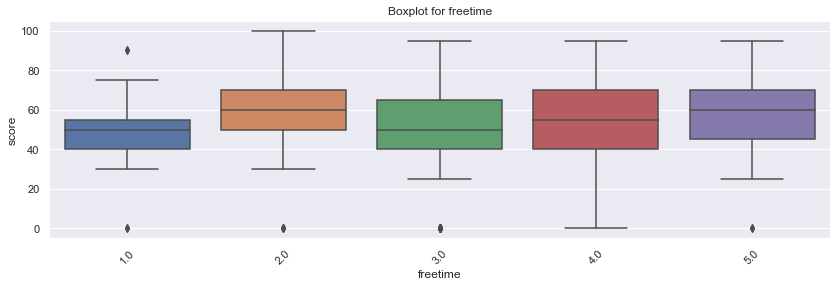

In [242]:
for col in ['freetime']:
    get_boxplot(col)

In [243]:
frt = pd.DataFrame(std_math.freetime.value_counts().sort_index())
print("%5s%10s  %5s        %4s" % ('freetime', 'count', 'mean', 'std'))
for index, row in frt.iterrows():
    print("%5s%10d   %5f    %5f" % (index, row[0], 
                                round(std_math.loc[std_math['freetime']==index]['score'].mean(), 2),
                                round(std_math.loc[std_math['freetime']==index]['score'].std(), 2)))

freetime     count   mean         std
  1.0        16   54.380000    17.590000
  2.0        59   61.440000    15.310000
  3.0       132   56.360000    15.310000
  4.0       102   56.760000    16.190000
  5.0        35   59.570000    19.750000


Строки с freetime = 16 не считаем, их слишком мало. Среднее на выборках 3 и 4 очень близки.
Проверим гипотезу на выборке для freetime = 2 о том, что истинное среднее равно X0 = 56.36, 
а альтернативной гипотезой будет утверждение о том, что X > X0

In [244]:
n = 59
X = 61.44
X0 = 56.36
s = 15.31

pv = test_hyp(n, X, X0, s, 0.05, 1)
pv

Нулевая гипотеза отвергается


0.006741198174369689

Еще проверим гипотезу на выборке для freetime = 5 о том, 
что истинное среднее равно X0 = 61.44, а альтернативной гипотезой будет утверждение о том, что X > X0

In [245]:
n = 35
X = 59.57
X0 = 56.36
s = 19.75

pv = test_hyp(n, X, X0, s, 0.05, 1)
pv

Нулевая гипотеза принимается


0.1715322784600909

Еще проверим гипотезу на выборке для freetime = 5 о том, 
что истинное среднее равно X0 = 61.44, а альтернативной гипотезой будет утверждение о том, что X < X0

In [246]:
n = 35
X = 59.57
X0 = 61.44
s = 19.75

pv = test_hyp(n, X, X0, s, 0.05, 0)
pv

Нулевая гипотеза принимается


0.2895229350991393

Мы получили не очень надежные свидетельства в пользу зависимости целевого признака от freetime. 
Истинные средние score для выборок с freetime 3, 4, 5 статистически между собой не отличаются.
Истинное среднее score выборки с freetime = 2 казалось бы выбивается из этой картины 
и статистически отличается от выборок с 3 и 4, но не отличается от 5.
Возможно, для предсказания значения целевого признака следует брать два состояния этого признака "значение = 2" и
"значение != 2"

Посмотрим корелляцию:

In [247]:
cr = std_math.corr()
abs(cr['freetime']).sort_values(ascending = False)

freetime        1.000000
goout           0.296392
famrel          0.183178
studytime       0.138339
failures        0.117867
health          0.072729
Mjobnum         0.072098
addressnum      0.059433
Pstatusnum      0.036821
schoolsupnum    0.032702
traveltime      0.023067
Medu            0.021363
guardiannum     0.015250
score           0.012457
Fjobnum         0.011021
absences        0.007748
Fedu            0.007031
age             0.004837
reasonnum       0.004310
Name: freetime, dtype: float64

Корелляция со score мала, что убеждает меня в ненужности этого признака для предсказания значений score.
Но видим хорошую корелляцию с признаком goout, который мы еще не изучали. 
Поэтому пока признак не удаляем, возможно, он пригодится для восстановления значений goout

## goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

Пропуски 2.02% всего 8

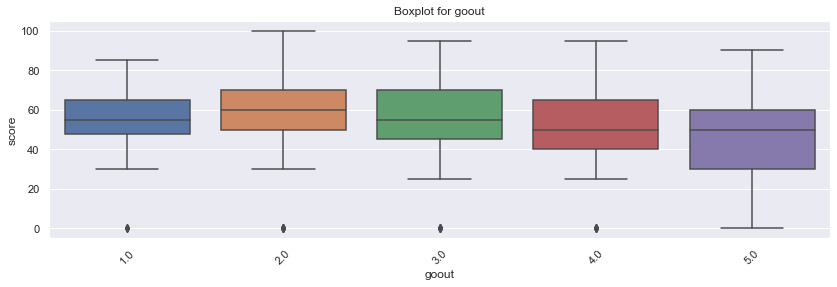

In [248]:
for col in ['goout']:
    get_boxplot(col)

In [249]:
gt = pd.DataFrame(std_math.goout.value_counts().sort_index())
print("%5s%10s  %5s        %4s" % ('goout', 'count', 'mean', 'std'))
for index, row in gt.iterrows():
    print("%5s%10d   %5f    %5f" % (index, row[0], 
                                round(std_math.loc[std_math['goout']==index]['score'].mean(), 2),
                                round(std_math.loc[std_math['goout']==index]['score'].std(), 2)))

goout     count   mean         std
  1.0        19   59.740000    14.670000
  2.0        92   61.470000    15.360000
  3.0       118   58.900000    16.040000
  4.0        74   54.190000    15.660000
  5.0        43   52.790000    17.870000


Видим, заметный разброс значений истинного среднего в зависимости от исследуемого признака.
И прослеживается логика: чрезмерная общительность отрицательно сказывается на результирующей оценке.
истинные средние для 1 и 2 заметно отличаются от значения для 5.
Попробуем протестировать отличие истинных средних для значений 3 и 4:
Проверим гипотезу на выборке для goout = 4 о том, 
что истинное среднее равно X0 = 58.9, а альтернативной гипотезой будет утверждение о том, что X < X0


In [250]:
n = 74
X = 54.19
X0 = 58.9
s = 15.66

pv = test_hyp(n, X, X0, s, 0.05, 0)
pv

Нулевая гипотеза отвергается


0.005831770994744125

Даже на таких близких значениях нулевая гипотеза отвергается. Т.е. мы имеем очевидную зависимость.
Посмотрим на корелляцию:

In [251]:
cr = std_math.corr()
abs(cr['goout']).sort_values(ascending = False)

goout           1.000000
freetime        0.296392
score           0.182286
age             0.123638
failures        0.112458
Medu            0.079928
addressnum      0.067331
Fedu            0.062863
Mjobnum         0.059233
guardiannum     0.056047
absences        0.050616
studytime       0.041389
reasonnum       0.036036
Fjobnum         0.034479
schoolsupnum    0.033062
famrel          0.029957
traveltime      0.029374
Pstatusnum      0.012829
health          0.010343
Name: goout, dtype: float64

Да, score здесь в лидерах, зависимость налицо.
Займемся восстановлением пропусков

In [252]:
pivot = std_math.pivot_table(values=['Medu'],
index=['freetime'],
columns=['goout'],
aggfunc='count')
display(pivot)

Medu                        
goout     1.0   2.0   3.0   4.0   5.0
freetime                             
1.0       3.0   7.0   4.0   1.0   NaN
2.0       4.0  24.0  17.0  10.0   4.0
3.0       4.0  33.0  58.0  23.0  10.0
4.0       3.0  17.0  33.0  35.0  13.0
5.0       4.0   7.0   4.0   4.0  16.0

По максимальным значениям count выделяем зависимость:
freetime  goout
   1         2
   2         2
   3         3
   4         4
   5         5      

Похоже это однозначная зависимость и это логично. Примем это предположение для отсутствующих значений goout = freetime.
Но проверим, что у них не пересекаются пропуски

In [253]:
std_math.loc[std_math['goout'].isnull()==True]['freetime']

89     1.0
92     3.0
200    3.0
202    4.0
241    3.0
322    3.0
Name: freetime, dtype: float64

In [254]:
stud_math.loc[stud_math['goout'].isnull()==True]['freetime']

89     1.0
92     3.0
200    3.0
202    4.0
221    3.0
241    3.0
312    5.0
322    3.0
Name: freetime, dtype: float64

Повезло, не пересекаются

In [255]:
def set_goout(raw):
    if not pd.isnull(raw['goout']):
        return raw['goout'] 
    else:
        return raw['freetime']    
std_math['goout'] = std_math.apply(set_goout, axis = 1) 
stud_math['goout'] = stud_math.apply(set_goout, axis = 1)

In [256]:
stud_math.loc[stud_math['goout'].isnull()==True]['freetime']

Series([], Name: freetime, dtype: float64)

## health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

Пропуски 3.8%	15

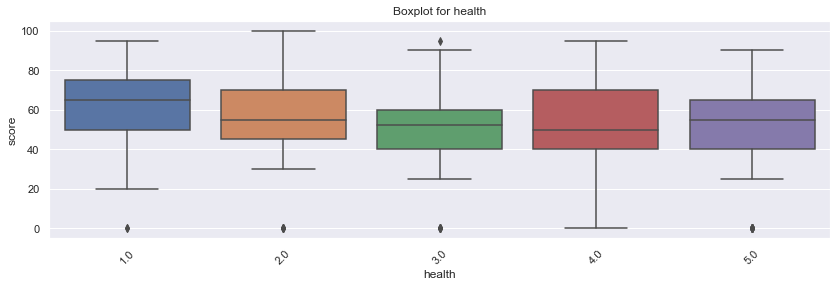

In [257]:
for col in ['health']:
    get_boxplot(col)

In [258]:
hl = pd.DataFrame(std_math.health.value_counts().sort_index())
print("%5s%10s  %5s        %4s" % ('health', 'count', 'mean', 'std'))
for index, row in gt.iterrows():
    print("%5s%10d   %5f    %5f" % (index, row[0], 
                                round(std_math.loc[std_math['health']==index]['score'].mean(), 2),
                                round(std_math.loc[std_math['health']==index]['score'].std(), 2)))

health     count   mean         std
  1.0        19   62.000000    18.100000
  2.0        92   61.390000    17.750000
  3.0       118   55.000000    14.730000
  4.0        74   57.550000    17.030000
  5.0        43   57.660000    15.620000


На первый взгляд по цифрам, зависимость сомнительная. Логика вещей тоже нарушается, из данных как бы следует, что у менее здоровых учеников успеваемость лучше. Хуже всего она у учеников со средним здоровьем. Не очень в это верится.
Тем не менее проверим гипотезу, что значение истинного среднего для здоровья = 4, отлично от максимального значения среднего из этих выборок.
Проверим гипотезу на выборке для health = 4 о том, 
что истинное среднее равно X0 = 61.39(берем значение для health =2, а не 1, потому что для 1 выборка мала), а альтернативной гипотезой будет утверждение о том, что X < X0

In [259]:
n = 75
X = 57.55
X0 = 61.39
s = 17.03

pv = test_hyp(n, X, X0, s, 0.05, 0)
pv

Нулевая гипотеза отвергается


0.027315534910396178

Проверим гипотезу на выборке для health = 3 о том, 
что истинное среднее равно X0 = 61.39, а альтернативной гипотезой будет утверждение о том, что X < X0

In [260]:
n = 122
X = 55
X0 = 61.39
s = 14.7

pv = test_hyp(n, X, X0, s, 0.05, 0)
pv

Нулевая гипотеза отвергается


2.2779058023254448e-06

Посмотрим на корелляцию:

In [261]:
cr = std_math.corr()
abs(cr['health']).sort_values(ascending = False)

health          1.000000
famrel          0.107806
guardiannum     0.105210
studytime       0.079282
score           0.075340
freetime        0.072729
Mjobnum         0.063231
age             0.056173
failures        0.048706
Medu            0.034968
Fedu            0.028546
schoolsupnum    0.028105
goout           0.020112
addressnum      0.019590
Fjobnum         0.017826
Pstatusnum      0.017720
absences        0.014308
reasonnum       0.001041
traveltime      0.000092
Name: health, dtype: float64

Результаты весьма шаткие: Формально вроде зависимость есть, но "на грани" и логически эта зависимость весьма спорная.

Попробуем заполнить пропуски используя наиболее скореллиованный признак famrel

In [262]:
pivot = stud_math.pivot_table(values=['Medu'],
index=['famrel'],
columns=['health'],
aggfunc='count')
display(pivot)

Medu                        
health   1.0   2.0   3.0   4.0   5.0
famrel                              
1.0      4.0   NaN   1.0   NaN   2.0
2.0      2.0   3.0   5.0   4.0   3.0
3.0      7.0   8.0  21.0  11.0  19.0
4.0     18.0  22.0  43.0  28.0  76.0
5.0     16.0  10.0  19.0  20.0  38.0

Заполним пропуски по такому принципу: 
    famrel = 1 - health = 1;
    famrel = 2 - health = 3;
    famrel = 3 - health = 3;
    famrel = 4 - health = 5;
    famrel = 5 - health = 5;

In [263]:
stud_math.loc[stud_math['health'].isnull()==True]['famrel']

30     5.0
55     5.0
88     4.0
145    4.0
153    4.0
164    5.0
189    3.0
208    4.0
220    4.0
236    4.0
256    4.0
259    3.0
266    5.0
330    4.0
342    4.0
Name: famrel, dtype: float64

In [264]:
def set_health(raw):
    if not pd.isnull(raw['health']):
        return raw['health']   
    elif raw['famrel'] == 1:
        return 1 
    elif raw['famrel'] in (2, 3):
        return 3 
    elif raw['famrel'] in (4, 5):
        return 5    
std_math['health'] = std_math.apply(set_health, axis = 1) 
stud_math['health'] = stud_math.apply(set_health, axis = 1)

In [265]:
stud_math.loc[stud_math['health'].isnull()==True]['famrel']

Series([], Name: famrel, dtype: float64)

## absences — количество пропущенных занятий

Пропуски absences	3.04%	12

In [266]:
std_math.absences.value_counts().sort_index()

0.0      74
1.0       3
2.0      60
3.0       7
4.0      52
5.0       5
6.0      30
7.0       6
8.0      20
9.0       3
10.0     17
11.0      2
12.0     12
13.0      2
14.0     12
15.0      2
16.0      7
17.0      1
18.0      5
19.0      1
20.0      4
21.0      1
22.0      3
23.0      1
24.0      1
25.0      1
26.0      1
28.0      1
30.0      1
38.0      1
40.0      1
54.0      1
56.0      1
75.0      1
212.0     1
385.0     1
Name: absences, dtype: int64

In [267]:
cr = std_math.corr()
abs(cr['absences']).sort_values(ascending = False)

absences        1.000000
Fjobnum         0.126896
age             0.112599
famrel          0.101116
schoolsupnum    0.098289
failures        0.090190
reasonnum       0.083837
Pstatusnum      0.068138
goout           0.052736
traveltime      0.047560
guardiannum     0.032460
studytime       0.029461
Medu            0.026989
addressnum      0.021668
Fedu            0.020271
health          0.019330
score           0.014039
freetime        0.007748
Mjobnum         0.007230
Name: absences, dtype: float64

Интуитивно представляется, что этот признак должен сильно влиять на конечную успеваемость. Но у него очень много значений и его неудобно анализировать. Его можно трансформировать в более удобную форму, например, по такому алгоритму:
0 - ни одного пропуска
1 - от 1 до 5 пропусков
2 - от 6 до 10 пропусков
3 - от 10 до 20 пропусков
4 - свыше 20 пропусков

In [268]:
def set_abs(raw):
    if pd.isnull(raw['absences']):
        return raw['absences']   
    elif raw['absences'] == 0:
        return 0 
    elif raw['absences'] >0 and raw['absences'] < 6:
        return 1
    elif raw['absences'] >= 6 and raw['absences'] < 11:
        return 2  
    elif raw['absences'] >= 11 and raw['absences'] < 21:
        return 3
    else:
        return 4
std_math['colabs'] = std_math.apply(set_abs, axis = 1) 
stud_math['colabs'] = stud_math.apply(set_abs, axis = 1) 
#stud_math['health'] = stud_math.apply(set_health, axis = 1)

In [269]:
std_math

,age,address,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,higher,famrel,freetime,goout,health,absences,score,addressnum,Fjobnum,Mjobnum,reasonnum,schoolsupnum,Pstatusnum,guardiannum,colabs
0,18,U,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,yes,4.0,3.0,4.0,3.0,6.0,30.0,1,1,4,0,1,2,2,2.0
1,17,U,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,5.0,3.0,3.0,3.0,4.0,30.0,1,5,4,4,2,0,1,1.0
2,15,U,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,yes,4.0,3.0,2.0,3.0,10.0,50.0,1,5,4,4,1,1,2,2.0
3,15,U,T,4.0,2.0,health,other,home,mother,1.0,3.0,0.0,no,yes,3.0,2.0,2.0,5.0,2.0,75.0,1,5,2,4,2,1,2,1.0
4,16,U,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,4.0,3.0,2.0,5.0,4.0,50.0,1,5,5,4,2,1,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,U,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,5.0,5.0,4.0,4.0,212.0,45.0,1,3,3,0,2,2,0,4.0
391,17,U,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,yes,2.0,4.0,5.0,2.0,3.0,80.0,1,3,3,0,2,1,2,1.0
392,21,R,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,no,NaN,5.0,5.0,3.0,3.0,3.0,35.0,2,5,5,4,2,1,0,1.0
393,18,R,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,yes,4.0,4.0,1.0,5.0,0.0,50.0,2,5,3,4,2,1,2,0.0


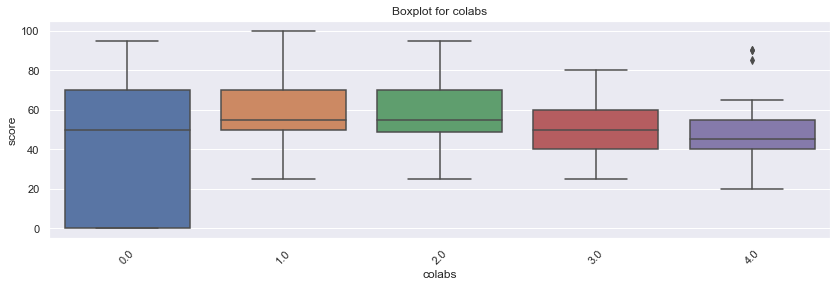

In [270]:
for col in ['colabs']:
    get_boxplot(col)

In [271]:
abcs = pd.DataFrame(std_math.colabs.value_counts().sort_index())
print("%5s%10s  %5s        %4s" % ('colabs', 'count', 'mean', 'std'))
for index, row in abcs.iterrows():
    print("%5s%10d   %5f    %5f" % (index, row[0], 
                                round(std_math.loc[std_math['colabs']==index]['score'].mean(), 2),
                                round(std_math.loc[std_math['colabs']==index]['score'].std(), 2)))

colabs     count   mean         std
  0.0        74   62.970000    15.480000
  1.0       127   57.990000    15.520000
  2.0        76   57.110000    15.880000
  3.0        48   50.100000    14.570000
  4.0        17   52.940000    19.850000


In [272]:
cr = std_math.corr()
abs(cr['colabs']).sort_values(ascending = False)

colabs          1.000000
absences        0.433204
score           0.223899
age             0.211957
guardiannum     0.199835
failures        0.189131
famrel          0.127036
goout           0.112849
studytime       0.070092
Medu            0.061094
Pstatusnum      0.046179
addressnum      0.042414
health          0.036840
Mjobnum         0.035298
schoolsupnum    0.027674
Fedu            0.019129
reasonnum       0.018891
freetime        0.018439
Fjobnum         0.008082
traveltime      0.005227
Name: colabs, dtype: float64

Увиденное наводит на мысль, что разбиение на категории можно выбрать более оптимально. 
Не очень удачной была идея выделить отсутствие пропусков в отдельную категорию.
И лучше стремиться чтобы для первых трех катеогорий, количество строк в них было близким.
Попробуем так:
0 - от 0 до 2; 1 - от 3 до 6 пропусков; 2 - от 7 до 12 пропусков 3 - от 13 до 25 пропусков 4 - свыше 25 пропусков

In [273]:
def set_abs1(raw):
    if pd.isnull(raw['absences']):
        return raw['absences']   
    elif raw['absences'] >= 0 and raw['absences'] < 3:
        return 0 
    elif raw['absences'] >= 3 and raw['absences'] < 7:
        return 1
    elif raw['absences'] >= 7 and raw['absences'] < 13:
        return 2  
    elif raw['absences'] >= 13 and raw['absences'] < 26:
        return 3
    else:
        return 4
std_math['colabs1'] = std_math.apply(set_abs1, axis = 1) 
stud_math['colabs1'] = stud_math.apply(set_abs1, axis = 1)

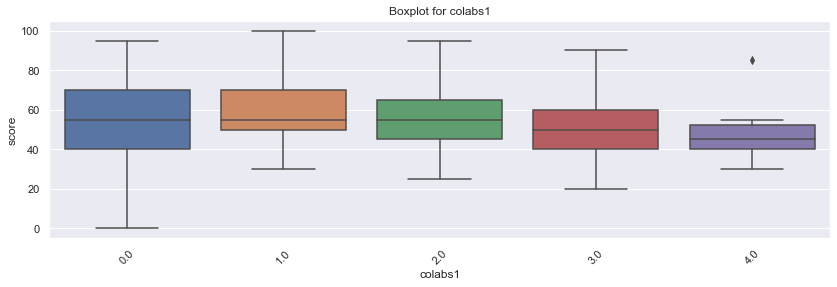

In [274]:
for col in ['colabs1']:
    get_boxplot(col)

In [275]:
abcs = pd.DataFrame(std_math.colabs1.value_counts().sort_index())
print("%5s%10s  %5s        %4s" % ('colabs1', 'count', 'mean', 'std'))
for index, row in abcs.iterrows():
    print("%5s%10d   %5f    %5f" % (index, row[0], 
                                round(std_math.loc[std_math['colabs1']==index]['score'].mean(), 2),
                                round(std_math.loc[std_math['colabs1']==index]['score'].std(), 2)))

colabs1     count   mean         std
  0.0       137   61.240000    15.130000
  1.0        94   57.550000    16.470000
  2.0        60   55.670000    14.910000
  3.0        41   50.000000    16.920000
  4.0        10   48.000000    14.940000


In [276]:
cr = std_math.corr()
abs(cr['colabs1']).sort_values(ascending = False)

colabs1         1.000000
colabs          0.913569
absences        0.455232
age             0.265278
score           0.242324
failures        0.184142
guardiannum     0.170838
goout           0.109076
famrel          0.107079
Medu            0.088145
studytime       0.083968
Pstatusnum      0.069265
Fedu            0.057457
health          0.054943
traveltime      0.044932
addressnum      0.041584
Mjobnum         0.011896
reasonnum       0.011581
freetime        0.011268
schoolsupnum    0.005603
Fjobnum         0.005263
Name: colabs1, dtype: float64

Разбиение в столбце colabs1 получилось более информативным. Его и оставим. Столбцы colabs и absences удалим, а оставшийся 
colabs1 переименуем в absences.

In [277]:
std_math.loc[std_math['absences'].isnull()==True]

,age,address,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,higher,famrel,freetime,goout,health,absences,score,addressnum,Fjobnum,Mjobnum,reasonnum,schoolsupnum,Pstatusnum,guardiannum,colabs,colabs1
24,15,R,T,2.0,4.0,services,health,course,mother,1.0,3.0,0.0,yes,yes,4.0,3.0,2.0,5.0,NaN,40.0,2,2,3,0,1,1,2,NaN,NaN
101,16,U,T,4.0,4.0,services,teacher,other,father,1.0,3.0,0.0,no,yes,4.0,4.0,3.0,4.0,NaN,85.0,1,1,3,0,2,1,1,NaN,NaN
120,15,U,T,1.0,2.0,at_home,other,course,mother,1.0,2.0,0.0,no,yes,3.0,2.0,3.0,1.0,NaN,75.0,1,5,4,4,2,1,2,NaN,NaN
129,16,R,T,4.0,4.0,teacher,teacher,course,mother,1.0,1.0,0.0,no,yes,3.0,5.0,5.0,4.0,NaN,90.0,2,1,1,0,2,1,2,NaN,NaN
172,17,U,T,4.0,4.0,teacher,other,reputation,mother,1.0,2.0,0.0,no,yes,4.0,4.0,4.0,5.0,NaN,50.0,1,5,1,4,2,1,2,NaN,NaN
215,17,U,T,3.0,2.0,other,other,reputation,mother,2.0,2.0,0.0,no,yes,4.0,4.0,4.0,1.0,NaN,75.0,1,5,5,4,2,1,2,NaN,NaN
227,17,U,NaN,2.0,3.0,services,services,reputation,father,1.0,2.0,0.0,no,NaN,5.0,3.0,3.0,3.0,NaN,60.0,1,3,3,0,2,0,1,NaN,NaN
254,17,U,T,2.0,1.0,other,other,course,mother,1.0,1.0,0.0,no,yes,4.0,4.0,2.0,5.0,NaN,60.0,1,5,5,4,2,1,2,NaN,NaN
265,18,R,NaN,3.0,4.0,services,other,reputation,mother,2.0,2.0,0.0,no,yes,4.0,2.0,5.0,1.0,NaN,85.0,2,5,3,4,2,0,2,NaN,NaN
352,18,U,T,1.0,3.0,at_home,services,course,mother,1.0,1.0,1.0,no,no,4.0,3.0,3.0,3.0,NaN,40.0,1,3,4,0,2,1,2,NaN,NaN


In [278]:
std_math = std_math.drop(['colabs', 'absences'], 1)
stud_math = stud_math.drop(['colabs', 'absences'], 1)

In [279]:
std_math.rename(columns={'colabs1': 'absences'}, inplace=True)
stud_math.rename(columns={'colabs1': 'absences'}, inplace=True)

In [280]:
std_math

,age,address,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,higher,famrel,freetime,goout,health,score,addressnum,Fjobnum,Mjobnum,reasonnum,schoolsupnum,Pstatusnum,guardiannum,absences
0,18,U,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,yes,4.0,3.0,4.0,3.0,30.0,1,1,4,0,1,2,2,1.0
1,17,U,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,5.0,3.0,3.0,3.0,30.0,1,5,4,4,2,0,1,1.0
2,15,U,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,yes,4.0,3.0,2.0,3.0,50.0,1,5,4,4,1,1,2,2.0
3,15,U,T,4.0,2.0,health,other,home,mother,1.0,3.0,0.0,no,yes,3.0,2.0,2.0,5.0,75.0,1,5,2,4,2,1,2,0.0
4,16,U,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,4.0,3.0,2.0,5.0,50.0,1,5,5,4,2,1,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,U,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,5.0,5.0,4.0,4.0,45.0,1,3,3,0,2,2,0,4.0
391,17,U,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,yes,2.0,4.0,5.0,2.0,80.0,1,3,3,0,2,1,2,1.0
392,21,R,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,no,NaN,5.0,5.0,3.0,3.0,35.0,2,5,5,4,2,1,0,1.0
393,18,R,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,yes,4.0,4.0,1.0,5.0,50.0,2,5,3,4,2,1,2,0.0


In [281]:
stud_math.loc[stud_math['absences'].isnull()==True]

,school,sex,age,address,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,higher,famrel,freetime,goout,health,score,Mjobnum,Fjobnum,absences
24,GP,F,15,R,T,2.0,4.0,services,health,course,mother,1.0,3.0,0.0,yes,yes,4.0,3.0,2.0,5.0,40.0,3,2.0,NaN
101,GP,M,16,U,T,4.0,4.0,services,teacher,other,father,1.0,3.0,0.0,no,yes,4.0,4.0,3.0,4.0,85.0,3,1.0,NaN
120,GP,F,15,U,T,1.0,2.0,at_home,other,course,mother,1.0,2.0,0.0,no,yes,3.0,2.0,3.0,1.0,75.0,4,5.0,NaN
129,GP,M,16,R,T,4.0,4.0,teacher,teacher,course,mother,1.0,1.0,0.0,no,yes,3.0,5.0,5.0,4.0,90.0,1,1.0,NaN
150,GP,M,18,U,T,1.0,1.0,other,other,course,mother,1.0,1.0,3.0,no,no,2.0,3.0,5.0,4.0,0.0,5,NaN,NaN
172,GP,M,17,U,T,4.0,4.0,teacher,other,reputation,mother,1.0,2.0,0.0,no,yes,4.0,4.0,4.0,5.0,50.0,1,5.0,NaN
215,GP,F,17,U,T,3.0,2.0,other,other,reputation,mother,2.0,2.0,0.0,no,yes,4.0,4.0,4.0,1.0,75.0,5,5.0,NaN
227,GP,M,17,U,NaN,2.0,3.0,services,services,reputation,father,1.0,2.0,0.0,no,NaN,5.0,3.0,3.0,3.0,60.0,3,3.0,NaN
254,GP,M,17,U,T,2.0,1.0,other,other,course,mother,1.0,1.0,0.0,no,yes,4.0,4.0,2.0,5.0,60.0,5,5.0,NaN
265,GP,M,18,R,NaN,3.0,4.0,services,other,reputation,mother,2.0,2.0,0.0,no,yes,4.0,2.0,5.0,1.0,85.0,3,5.0,NaN


In [282]:
cr = std_math.corr()
abs(cr['absences']).sort_values(ascending = False)

absences        1.000000
age             0.265278
score           0.242324
failures        0.184142
guardiannum     0.170838
goout           0.109076
famrel          0.107079
Medu            0.088145
studytime       0.083968
Pstatusnum      0.069265
Fedu            0.057457
health          0.054943
traveltime      0.044932
addressnum      0.041584
Mjobnum         0.011896
reasonnum       0.011581
freetime        0.011268
schoolsupnum    0.005603
Fjobnum         0.005263
Name: absences, dtype: float64

Попробуем восстановить пропуски по age

In [283]:
pivot = std_math.pivot_table(values=['Medu'],
index=['age'],
columns=['absences'],
aggfunc='count')
display(pivot)

Medu                       
absences   0.0   1.0   2.0   3.0  4.0
age                                  
15        42.0  19.0  12.0   NaN  1.0
16        41.0  25.0  14.0  12.0  2.0
17        28.0  29.0  12.0  14.0  3.0
18        23.0  15.0  19.0   9.0  1.0
19         2.0   4.0   3.0   5.0  2.0
20         1.0   1.0   NaN   NaN  1.0
21         NaN   1.0   NaN   NaN  NaN
22         NaN   NaN   NaN   1.0  NaN

Возьмем на вооружение такой алгоритм:
age 15 - absences 0: 16 - 0: 17 - 1: 18 - 1: 19 - 2: 20 и выше - 3

In [284]:
def set_absences(raw):
    if not pd.isnull(raw['absences']):
        return raw['absences']   
    elif raw['age'] in (15, 16):
        return 0 
    elif raw['age'] in (17, 18):
        return 1
    elif raw['age'] == 19:
        return 2
    else:
        return 3
std_math['absences'] = std_math.apply(set_absences, axis = 1) 
stud_math['absences'] = stud_math.apply(set_absences, axis = 1)

In [285]:
std_math.loc[std_math['absences'].isnull()==True]

,age,address,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,higher,famrel,freetime,goout,health,score,addressnum,Fjobnum,Mjobnum,reasonnum,schoolsupnum,Pstatusnum,guardiannum,absences


In [286]:
abcs = pd.DataFrame(std_math.absences.value_counts().sort_index())
print("%5s%10s  %5s        %4s" % ('absences', 'count', 'mean', 'std'))
for index, row in abcs.iterrows():
    print("%5s%10d   %5f    %5f" % (index, row[0], 
                                round(std_math.loc[std_math['absences']==index]['score'].mean(), 2),
                                round(std_math.loc[std_math['absences']==index]['score'].std(), 2)))

absences     count   mean         std
  0.0       141   61.560000    15.390000
  1.0       100   57.800000    16.410000
  2.0        60   55.670000    14.910000
  3.0        41   50.000000    16.920000
  4.0        10   48.000000    14.940000


Проверим гипотезу на выборке для absences = 1 о том, что истинное среднее равно X0 = 61.56, а альтернативной гипотезой будет утверждение о том, что X < X0

In [287]:
n = 100
X = 57.8
X0 = 61.56
s = 16.41

pv = test_hyp(n, X, X0, s, 0.05, 0)
pv

Нулевая гипотеза отвергается


0.012033060357405364

Видим, что признак влияет на целевой score, оставляем его в обойме.

## Удаление ненужных признаков

Ранее нами были оставлены ряд признаков не влияющих на целевой и оставались несколько вспомогательных. Удалим их сейчас

In [288]:
std_math = std_math.drop(['Pstatus', 'Pstatusnum', 'reason', 'reasonnum', 'guardian', 'guardiannum', 
                          'traveltime', 'Mjobnum', 'Fjobnum', 'schoolsupnum', 'addressnum'], 1)

In [289]:
stud_math = stud_math.drop(['Pstatus', 'reason', 'guardian', 'traveltime', 'Mjobnum', 'Fjobnum'], 1)

## Выводы и итоги

Качество данных:
Оно вызывет некоторые вопросы. 
Например, для меня странно, что успеваемость существенно зависит от возраста и, при этом пришлось отсеять как несущественные такие признаки как famsup — семейная образовательная поддержка, paid — дополнительные платные занятия по математике (yes или no) и activities — дополнительные внеучебные занятия (yes или no), которые по логике вещей должны более серьезно влиять на успеваемость, чем возраст. Странно слишком большое количество нулевых отметок в исходной выборке, которые я посчитал в рамках данного исследования ошибкой и отфильтровал. Пропусков в данных немного и их можно заполнить без серьезного влияния на поведение модели. Хотя, это суждение оценочное и строго обосновать его, кроме как ссылкой на интуициию, больше нечем.

На основании проделанного анализа мы можем выделить признаки, наиболее существенно влияющие на целевой признак.
"Наиболее существенно", здесь оценка весьма приблизительная. Критериями для такой оценки являются как достаточно выраженная зависимость среднего значения score при различных значениях признака, так и достаточность выборок. Например, признак higher я не включаю в этот список, несмотря на очень болшую разницу в истинных средних score для yes и no. Потому что количество значений для значения no очень мало.
Итак, к основным признакам я отношу: age, Medu, studytime, schoolsup, absences.
Можно было бы построить сначала на них простую предсказательрную модель, если бы стояла задача, например, сделать
это используя минимальное количество признаков. У меня нет уверенности, что модель построенная с использованием всех, оставленных мной признаков была бы более корректной.

В финале, можно задаться вопросом как можно было бы предсказать значение целевого признака, по аналогии с тем как я 
восстанавливал отсутствующие значения у других признаков в этой работе.

Можно попробовать решить эту задачу в "лоб". Попробую сейчас предсказать значение score для выборки stud_math для строк в коротых score Nan или 0, которые я исключил из рабочей выборки. Идея в том, чтобы в цикле перебирать строки для которых нужно 
предсказать значение score и для каждой строки отфильтровывать в рабочей выборке строки с такими же значениями признаков из набора, признаного мной набором существенных признаков. Если получится несколько строк - берем по ним среднее значение score.
Всего у нас 43 строки, в которых нужно предсказать значение score.

In [290]:
stud_math.loc[(stud_math['score'].isnull()==True) | (stud_math['score']==0)].age.count()

43

Например, возьмем строку с индексом 128

In [291]:
stud_math.loc[128]

school          GP
sex              M
age             18
address          R
Medu             2
Fedu             2
Mjob         other
Fjob         other
studytime        1
failures         2
schoolsup       no
higher         yes
famrel           3
freetime         3
goout            3
health           4
score            0
absences         0
Name: 128, dtype: object

А теперь найдем количество строк и среднее по score по датасету std_math для age = 18, как в строке для которой пытаемся предсказать значение. Видим что строк 69, а среднее значение целевого признака - 56.02

In [292]:
display(std_math.loc[std_math['age']==18]['score'].count())
display(std_math.loc[std_math['age']==18]['score'].mean())
display(std_math.loc[std_math['age']==18]['score'].std())

69

56.01449275362319

16.462517813312257

Добавим в фильтр следующий признак Medu. Видим, что в выборке уже 15 строк и среднее целевого признака уточнилось:
до 56.33

In [293]:
sel = std_math.loc[(std_math['age']==18)&(std_math['Medu']==2)]

In [294]:
display(sel['score'].count())
display(sel['score'].mean())
display(sel['score'].std())

15

56.333333333333336

16.30804650938858

Действуя далее по аналогии, добавляя в фильтр по одному признаку добиваемся ситуации когда получаем одну строку
и значение 50

In [295]:
sel = std_math.loc[(std_math['age']==18)&(std_math['Medu']==2)&(std_math['studytime']==1)]

In [296]:
display(sel['score'].count())
display(sel['score'].mean())

3

41.666666666666664

In [297]:
sel = std_math.loc[(std_math['age']==18)&(std_math['Medu']==2)&(std_math['studytime']==1)&(std_math['schoolsup']=='no')]

In [298]:
display(sel['score'].count())
display(sel['score'].mean())

3

41.666666666666664

In [299]:
sel = std_math.loc[(std_math['age']==18)&(std_math['Medu']==2)&(std_math['studytime']==1)
                   &(std_math['schoolsup']=='no')&(std_math['absences']==0)]

In [300]:
display(sel['score'].count())
display(sel['score'].mean())

1

50.0

Попробуем описать этот алгоритм функцией и применить к выборке, создав новый столбец scorenew:

In [301]:
def set_score(raw):
    if not pd.isnull(raw['score']) and raw['score']!=0:
        return raw['score']
    else:
        mean = 0
        sel = std_math.loc[std_math['age']==0]['score']
        if std_math.loc[(std_math['age']==raw['age'])]['score'].count() > 30:
            sel = std_math.loc[std_math['age']==raw['age']]        
        if std_math.loc[(std_math['Medu']==raw['Medu'])]['score'].count() > 30 and len(sel) != 0:   
            sel = sel.loc[sel['Medu']==raw['Medu']] 
        elif std_math.loc[(std_math['Medu']==raw['Medu'])]['score'].count() > 30:
            sel = std_math.loc[std_math['Medu']==raw['Medu']]
        if len(sel) == 0:
            return 0
        else:
            mean = round(sel.score.mean(), 2)        
        #print('mean1=', mean)
        if sel.loc[(sel['studytime']==raw['studytime'])]['score'].count() > 0:
            sel = sel.loc[sel['studytime']==raw['studytime']]
            mean = round(sel.score.mean(), 2)
            #print('mean2=', mean)
        else:
            return mean
        if sel.loc[(sel['schoolsup']==raw['schoolsup'])]['score'].count() > 0:
            sel = sel.loc[sel['schoolsup']==raw['schoolsup']] 
            mean = round(sel.score.mean(), 2)
            #print('mean3=', mean)
        else:
            return mean
        #print('absences=', raw['absences'])
        if sel.loc[(sel['absences']==raw['absences'])]['score'].count() > 0:
            sel = sel.loc[sel['absences']==raw['absences']] 
            mean = round(sel.score.mean(), 2)
            #print('mean4=', mean)
        else:
            return mean         
        return mean 
stud_math['scorenew'] = stud_math.apply(set_score, axis = 1)

In [302]:
stud_math.loc[(stud_math['score'].isnull()==True) | (stud_math['score']==0)].score.count()

37

Проверим не заменил ли значения которые не нужно было трогать. Все нормально:

In [303]:
stud_math.loc[(stud_math['score'].isnull()==False) & (stud_math['score']!=0)&(stud_math['score']!=stud_math['scorenew'])]

,school,sex,age,address,Medu,Fedu,Mjob,Fjob,studytime,failures,schoolsup,higher,famrel,freetime,goout,health,score,absences,scorenew


Теперь сравниваем распределение признаков score и scorenew в датасете stud_math и пытаемся оценить качество нашего предсказания. Критерием качества предполагается схожесть распределений и по истинному среднему и по прочим характеристикам.
Результат неудовлетворительный. см. графики и сравнения ниже и выводы в самом конеце.

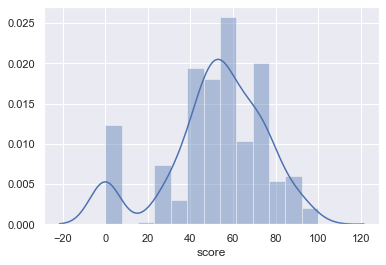

In [304]:
sns.set()
sns.distplot(stud_math['score'])

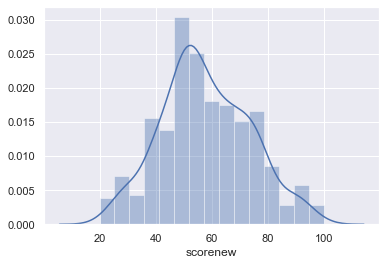

In [305]:
sns.set()
sns.distplot(stud_math['scorenew'])

Распределение "вытянулось" в сторону бОльших значений. Т.е. мое предсказание, очевидно завысило
оценки, причем так сильно, что всего 43 строки из 395 очень сильно повлияли на картину распределения.

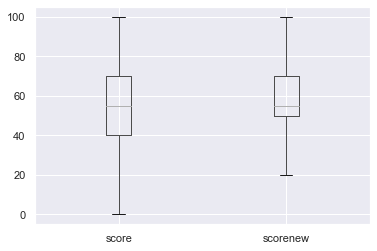

In [306]:
boxplot = stud_math.boxplot(column=['score', 'scorenew'])

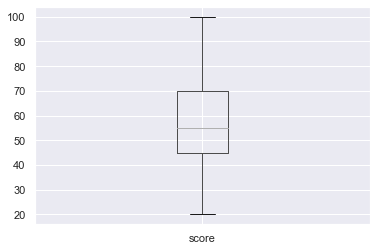

In [307]:
boxplot = std_math.boxplot(column=['score'])

In [308]:
Посмотрим на распределение значений score только в тех строках, для которых мы предсказывали его:

SyntaxError: invalid syntax (<ipython-input-308-9d406656e950>, line 1)

In [ ]:
sns.set()
newsel = stud_math.loc[(stud_math['score'].isnull()==True) | (stud_math['score']==0)]
sns.distplot(newsel['scorenew'])

In [ ]:
Видим, что истинное среднее score по полной выборке действительно приблизилось в истинному среднему
по выборке на которой мы настраивали признаки. Но нижний квартиль "задрался" аж на 10 пунктов. 
Распределение перестало быть симметричным. По сути, примитивный алгоритм предсказания, который я применил, видимо
приводит к "дотягиванию" истинного среднего score по общей выборки до истинного среднего score в обучающей выборке.


In [ ]:
print(std_math.score.mean(), std_math.score.std(), 
      std_math.score.quantile(0.25, interpolation ='linear'), std_math.score.quantile(0.75, interpolation ='linear'))

In [ ]:
print(stud_math.score.mean(), stud_math.score.std(),
     stud_math.score.quantile(0.25, interpolation ='linear'), stud_math.score.quantile(0.75, interpolation ='linear'))

In [ ]:
print(stud_math.scorenew.mean(), stud_math.scorenew.std(),
      stud_math.scorenew.quantile(0.25, interpolation ='linear'), stud_math.scorenew.quantile(0.75, interpolation ='linear'))

In [ ]:
Распределение симметричное.

In [ ]:
boxplot = newsel.boxplot(column=['scorenew'])

In [ ]:
Контроль, что функция вернула по строке 128 тоже значение, которое мы получили без нее.

In [ ]:
set_score(stud_math.loc[128])

Проблема данного метода, видимо, в том, что для предсказываемых строк с одинаковым набором "значимых" параметров он вернет одно и тоже значение, в то время как в реальности по ним будет случайное распределение. Я же его по сути заменил постоянной величиной, поэтому получил искажение распределения.   